In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:

path =  "TIQ data - Hashir International Institute.csv"

df =  pd.read_csv(path)

df.head(3)

age  gender  tinnitus  hyperacusis  misophonia  earpain  discharge  \
0   53       2         1            1           1        1          2   
1   59       1         1            1           1        1          2   
2   35       1         1            1           1        2          2   

   balance  seenENT  noiseexposure  ...  SADT  PTAbetter  \
0      1.0      2.0            1.0  ...   4.0         21   
1      2.0      1.0            1.0  ...   2.0         47   
2      2.0      2.0            1.0  ...   2.0          7   

          PTAbettergroup  PTAworse          PTAworsegroup  ptaacross  hiqcat  \
0      Mild Hearing Loss        26      Mild Hearing Loss       23.5     1.0   
1  Moderate Hearing Loss        50  Moderate Hearing Loss       48.5     0.0   
2        No Hearing Loss         9        No Hearing Loss        8.0     0.0   

   SADcat   ST  STCat  
0     1.0  2.0    0.0  
1     0.0  2.0    0.0  
2     0.0  1.0    0.0  

[3 rows x 83 columns]

# Exploratory Data Analysis

In [3]:
df.columns

Index(['age', 'gender', 'tinnitus', 'hyperacusis', 'misophonia', 'earpain',
       'discharge', 'balance', 'seenENT', 'noiseexposure', 'dreams',
       'asdfamily', 'parentMH', 'familyhist', 'duration', 'lateral', 'a1',
       'l1', 'e1', 'sad1', 'sad2', 'sad3', 'sad4', 'historyMH', 'seenMH',
       'suicide', 'ss1', 'ss2', 'ss3', 'ss4', 'ss5', 'ih1', 'ih2', 'ih3',
       'ih4', 'ih5', 'ih6', 'ih7', 'ih8', 'im1', 'im2', 'im3', 'im4', 'im5',
       'im6', 'im7', 'im8', 'itin1n', 'itin2n', 'itin3n', 'itin4n', 'itin5n',
       'itin6n', 'itin7n', 'pta025r', 'pta05r', 'pta1r', 'pta2r', 'pta3r',
       'pta4r', 'pta6r', 'pta8r', 'pta025l', 'pta05l', 'pta1l', 'pta2l',
       'pta3l', 'pta4l', 'pta6l', 'pta8l', 'imTotal', 'ihTotal', 'tinNTotal',
       'SADT', 'PTAbetter', 'PTAbettergroup', 'PTAworse', 'PTAworsegroup',
       'ptaacross', 'hiqcat', 'SADcat', 'ST', 'STCat'],
      dtype='object')

# Selecting Relevant Variables for the Study

In [4]:
df = df[['age', 'gender','misophonia', 'im1', 'im2', 'im3', 'im4', 'im5',
       'im6', 'im7', 'im8', 'pta025r', 'pta05r', 'pta1r', 'pta2r', 'pta3r',
       'pta4r', 'pta6r', 'pta8r', 'pta025l', 'pta05l', 'pta1l', 'pta2l',
       'pta3l', 'pta4l', 'pta6l', 'pta8l', 'imTotal']]

df.head(3)

age  gender  misophonia  im1  im2  im3  im4  im5  im6  im7  ...  pta8r  \
0   53       2           1    3    3    0    3    0    3    3  ...     60   
1   59       1           1    1    1    0    1    1    1    0  ...     80   
2   35       1           1    0    3    1    1    2    3    3  ...      5   

   pta025l  pta05l  pta1l  pta2l  pta3l  pta4l  pta6l  pta8l  imTotal  
0       20      15     15     15   35.0     40   55.0     65       15  
1       55      50     45     45   45.0     55   55.0     80        5  
2        5       5     10     10    5.0      5    5.0      5       16  

[3 rows x 28 columns]

In [5]:
df.describe().round(2)

age  gender  misophonia    im1    im2    im3    im4    im5    im6  \
count  19.00   19.00       19.00  19.00  19.00  19.00  19.00  19.00  19.00   
mean   41.95    1.68        1.16   0.68   1.05   0.37   0.74   0.74   1.37   
std    15.93    0.48        0.37   1.06   1.22   0.68   1.05   0.93   1.30   
min    15.00    1.00        1.00   0.00   0.00   0.00   0.00   0.00   0.00   
25%    36.00    1.00        1.00   0.00   0.00   0.00   0.00   0.00   0.00   
50%    45.00    2.00        1.00   0.00   1.00   0.00   0.00   0.00   1.00   
75%    52.00    2.00        1.00   1.00   2.00   0.50   1.00   1.00   3.00   
max    68.00    2.00        2.00   3.00   3.00   2.00   3.00   3.00   3.00   

         im7  ...  pta8r  pta025l  pta05l  pta1l  pta2l  pta3l  pta4l  pta6l  \
count  19.00  ...  19.00    19.00    19.0  19.00  19.00  16.00  19.00  16.00   
mean    0.84  ...  23.16    11.84    10.0  12.11  12.11  21.56  22.63  27.50   
std     1.17  ...  24.11    12.50    11.3   9.90  10.71  13.99  20.03  20.33   
min     0.00  ...   0.00    -5.00    -5.0   0.00  -5.00   5.00   0.00   0.00   
25%     0.00  ...   5.00     5.00     5.0  10.00   5.00   8.75   5.00   8.75   
50%     0.00  ...  10.00    10.00    10.0  10.00  10.00  20.00  15.00  27.50   
75%     1.50  ...  35.00    15.00    12.5  15.00  15.00  35.00  40.00  42.50   
max     3.00  ...  80.00    55.00    50.0  45.00  45.00  45.00  65.00  55.00   

       pta8l  imTotal  
count  19.00    19.00  
mean   25.26     6.05  
std    25.08     6.54  
min   -15.00     0.00  
25%     5.00     0.00  
50%    20.00     5.00  
75%    40.00    11.50  
max    80.00    17.00  

[8 rows x 28 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         19 non-null     int64  
 1   gender      19 non-null     int64  
 2   misophonia  19 non-null     int64  
 3   im1         19 non-null     int64  
 4   im2         19 non-null     int64  
 5   im3         19 non-null     int64  
 6   im4         19 non-null     int64  
 7   im5         19 non-null     int64  
 8   im6         19 non-null     int64  
 9   im7         19 non-null     int64  
 10  im8         19 non-null     int64  
 11  pta025r     19 non-null     int64  
 12  pta05r      19 non-null     int64  
 13  pta1r       19 non-null     int64  
 14  pta2r       19 non-null     int64  
 15  pta3r       16 non-null     float64
 16  pta4r       19 non-null     int64  
 17  pta6r       16 non-null     float64
 18  pta8r       19 non-null     int64  
 19  pta025l     19 non-null     int

## Checking for missing values

In [7]:
df.isnull().sum()

age           0
gender        0
misophonia    0
im1           0
im2           0
im3           0
im4           0
im5           0
im6           0
im7           0
im8           0
pta025r       0
pta05r        0
pta1r         0
pta2r         0
pta3r         3
pta4r         0
pta6r         3
pta8r         0
pta025l       0
pta05l        0
pta1l         0
pta2l         0
pta3l         3
pta4l         0
pta6l         3
pta8l         0
imTotal       0
dtype: int64

## Replacing missing values with zeros

In [8]:
df.fillna(0, inplace = True)

In [9]:
df.isnull().sum()

age           0
gender        0
misophonia    0
im1           0
im2           0
im3           0
im4           0
im5           0
im6           0
im7           0
im8           0
pta025r       0
pta05r        0
pta1r         0
pta2r         0
pta3r         0
pta4r         0
pta6r         0
pta8r         0
pta025l       0
pta05l        0
pta1l         0
pta2l         0
pta3l         0
pta4l         0
pta6l         0
pta8l         0
imTotal       0
dtype: int64

## Data Visualisation for Descriptive Statistics

In [22]:
df.gender.tolist()
df.misophonia.tolist()

[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1]

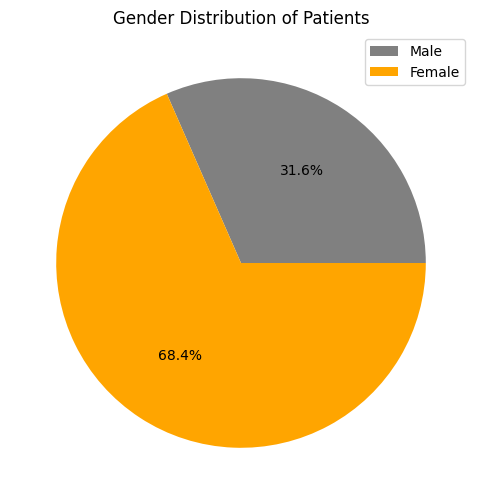

In [41]:
import matplotlib.pyplot as plt

gender_data = df.gender.tolist()
gender_labels = ['Male', 'Female']

male_count = gender_data.count(1)
female_count = gender_data.count(2)
gender_counts = [male_count, female_count]

plt.figure(figsize=(6, 6))
plt.pie(gender_counts,  autopct='%1.1f%%', startangle=360, colors=['gray', 'orange'])
plt.legend(labels=gender_labels)
plt.title('Gender Distribution of Patients')
plt.savefig("Gender_plot.png")
plt.show()


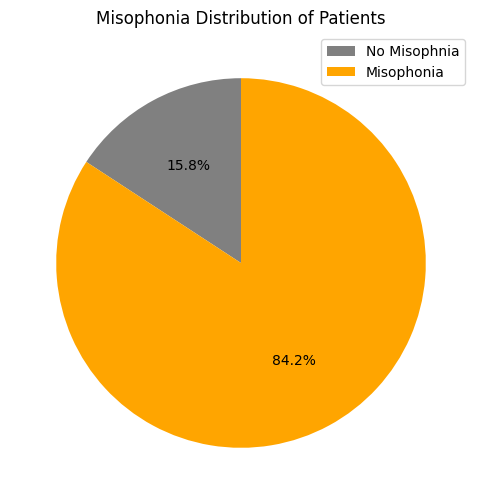

In [27]:
import matplotlib.pyplot as plt

misophonia_data = df.misophonia.tolist()
misophonia_labels = ['No Misophnia', 'Misophonia']

yes = misophonia_data.count(2)
no = misophonia_data.count(1)
misophonia_counts = [yes, no]

plt.figure(figsize=(6, 6))
plt.pie(misophonia_counts,  autopct='%1.1f%%', startangle=90, colors=['gray', 'orange'])
plt.legend(labels=misophonia_labels)
plt.title('Misophonia Distribution of Patients')
plt.savefig("Misophonia_plot.png")
plt.show()




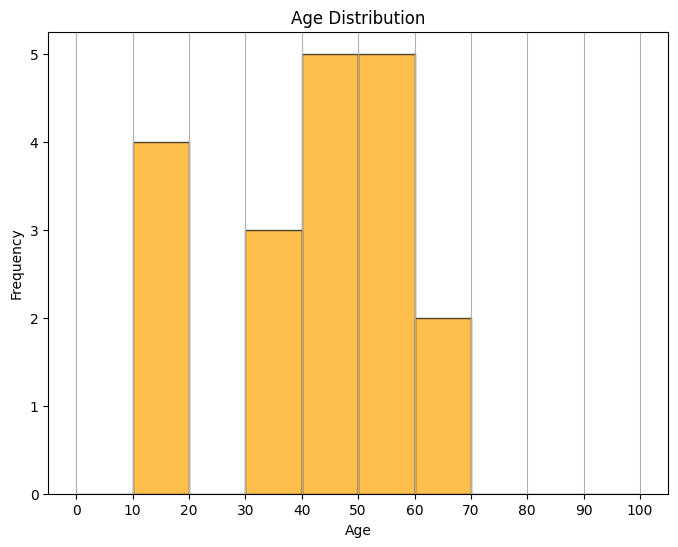

In [38]:
import matplotlib.pyplot as plt
import pandas as pd  # Make sure to import pandas if not already done

# Assuming 'df' is your DataFrame containing the 'age' column
age_data = df['age']

# Define the age bins for the histogram
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.figure(figsize=(8, 6))
plt.hist(age_data, bins=age_bins, edgecolor='black', alpha=0.7, color ="orange")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.xticks(age_bins)
plt.grid(alpha=1, axis='x')
plt.savefig("Age_hist")
plt.show()


# Normality Test for all Variables

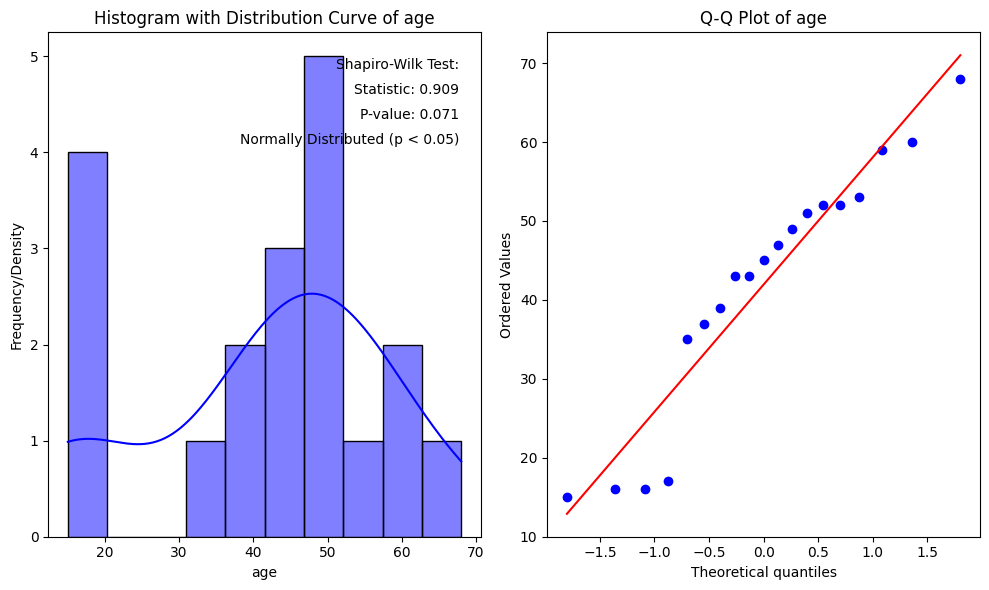

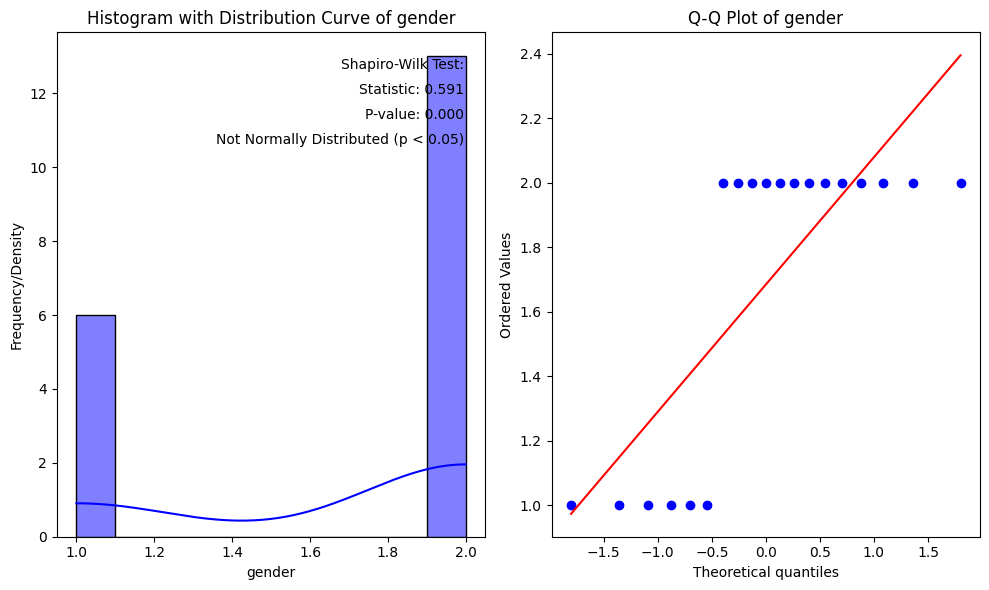

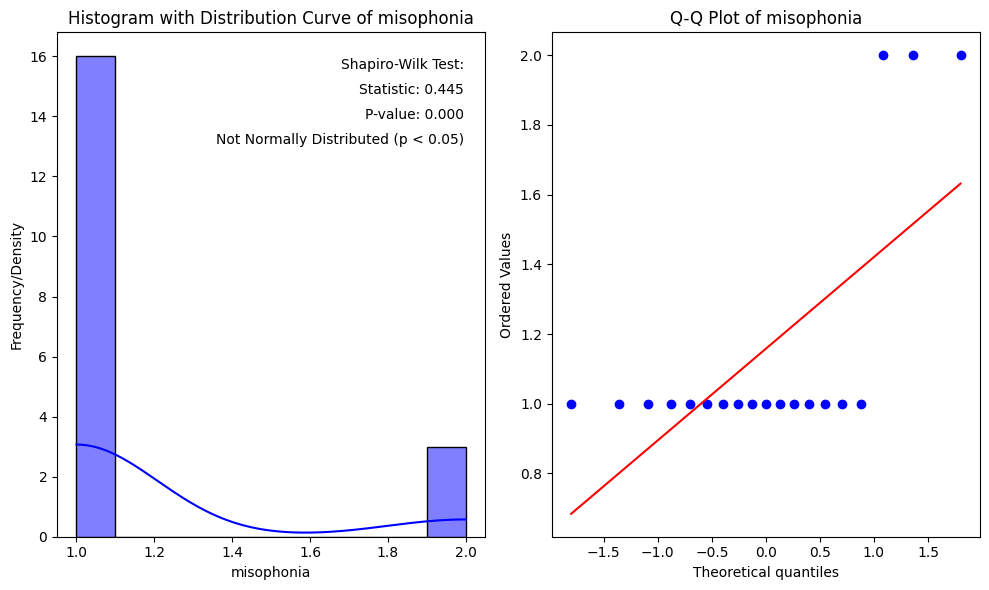

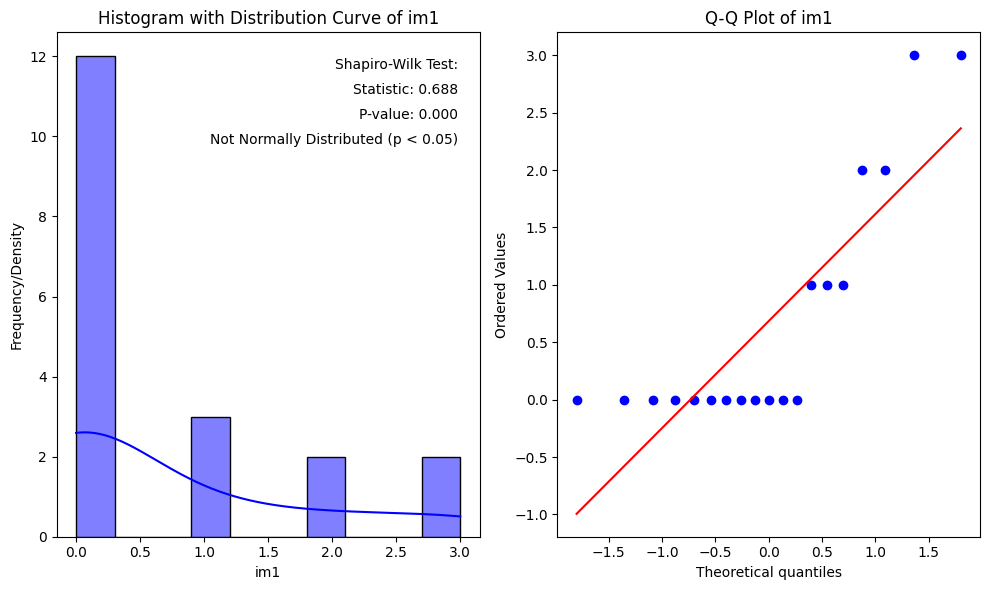

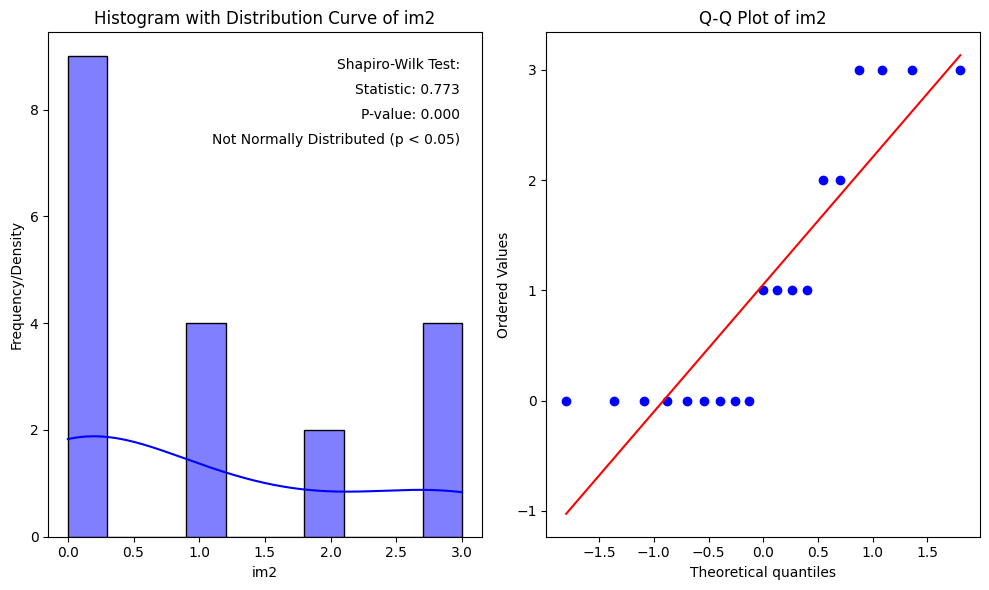

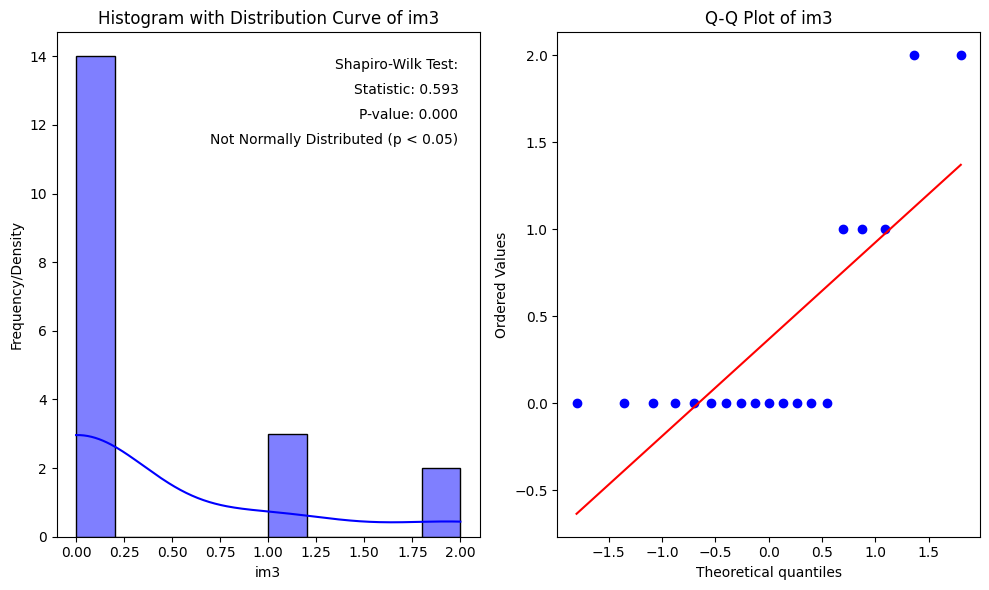

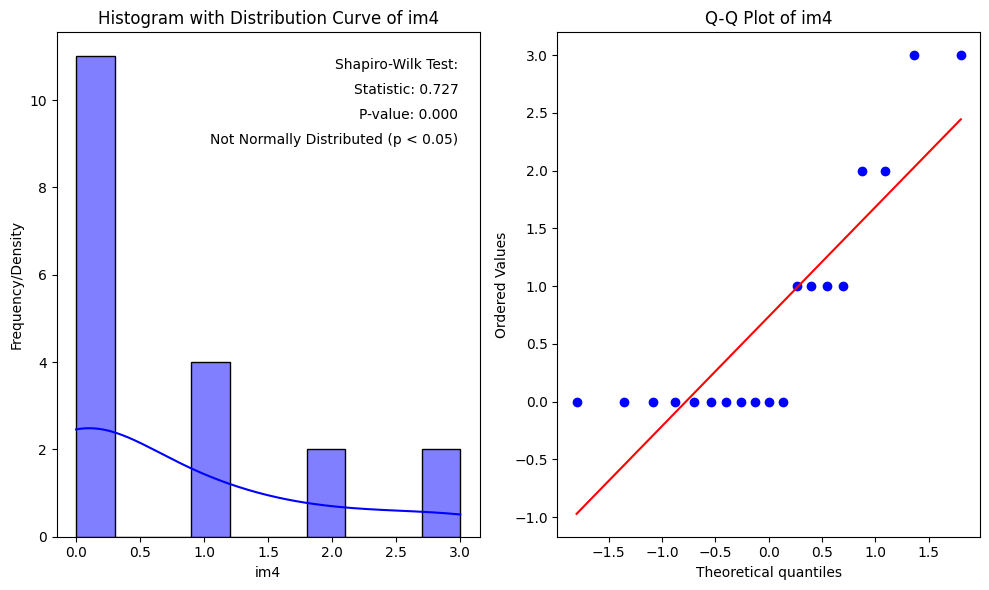

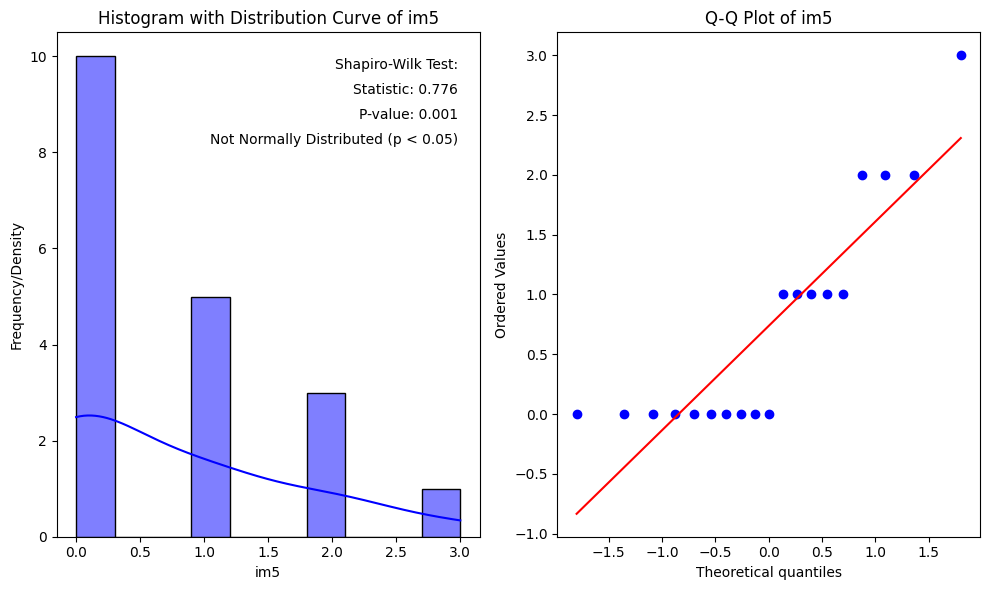

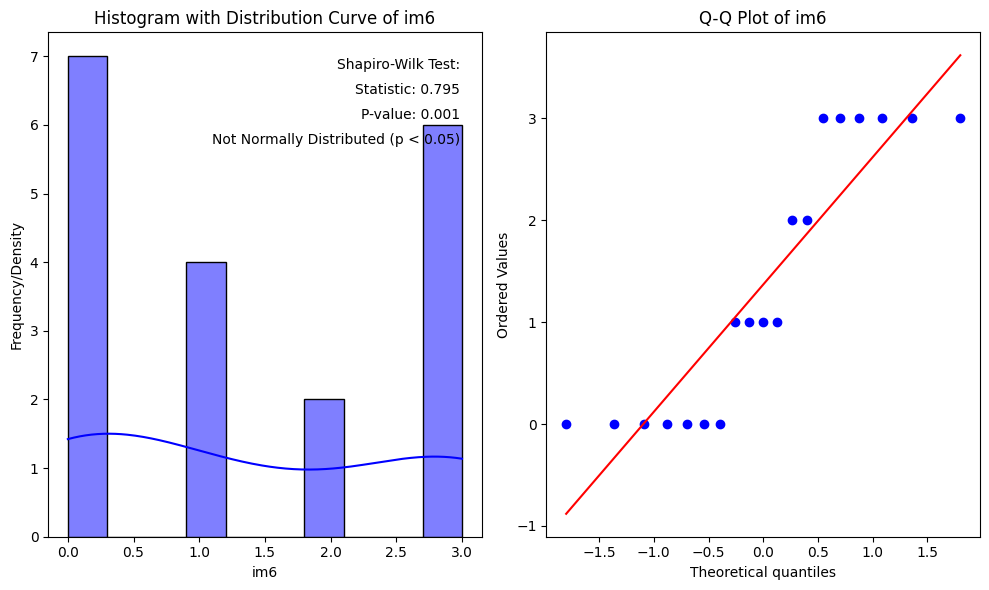

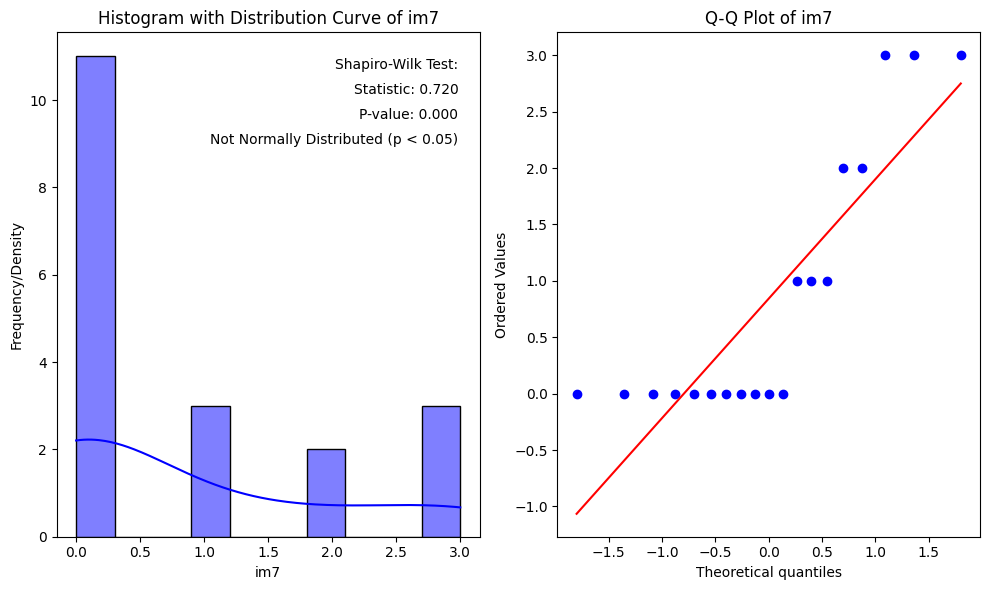

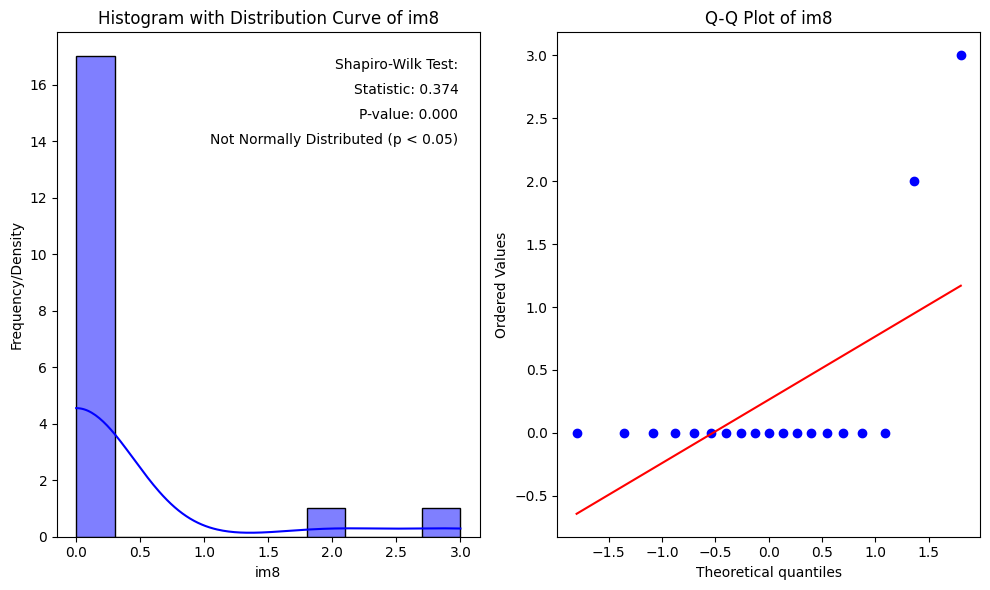

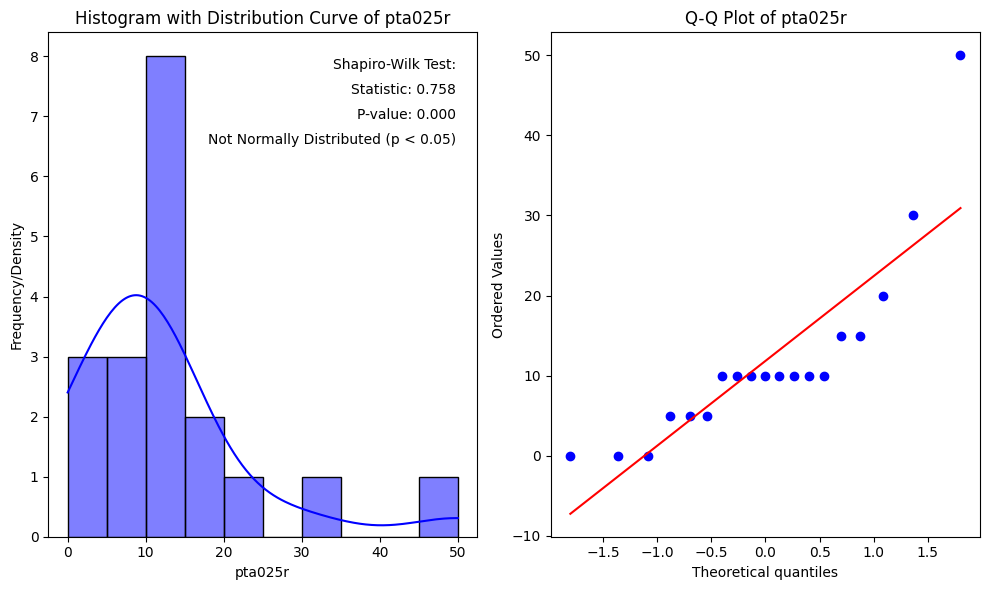

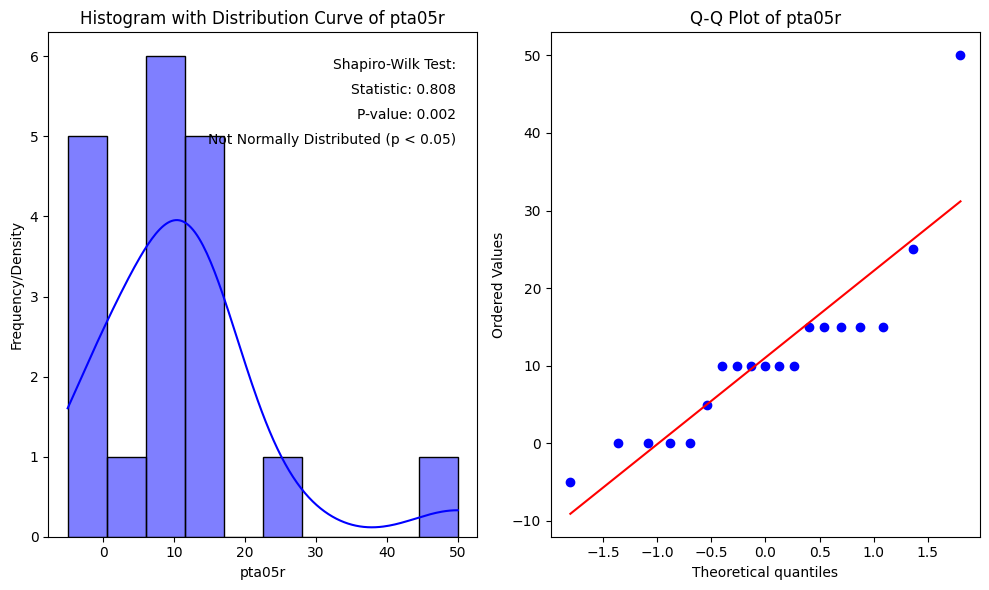

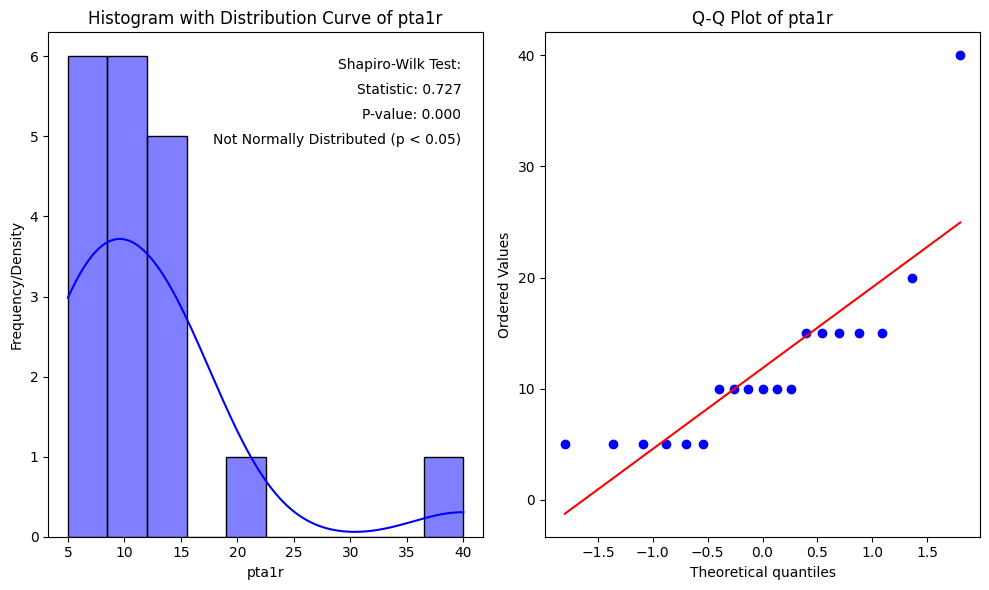

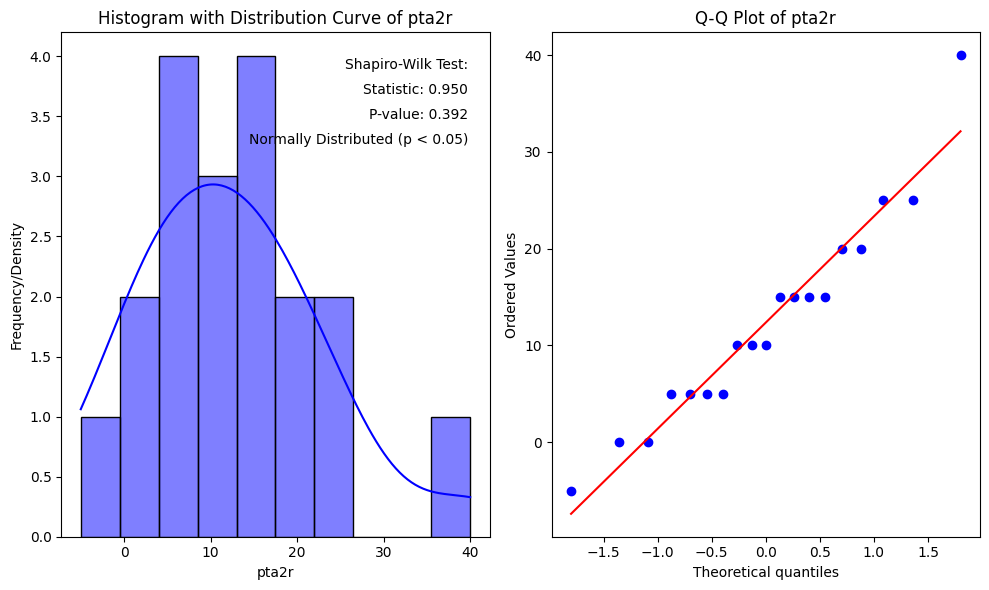

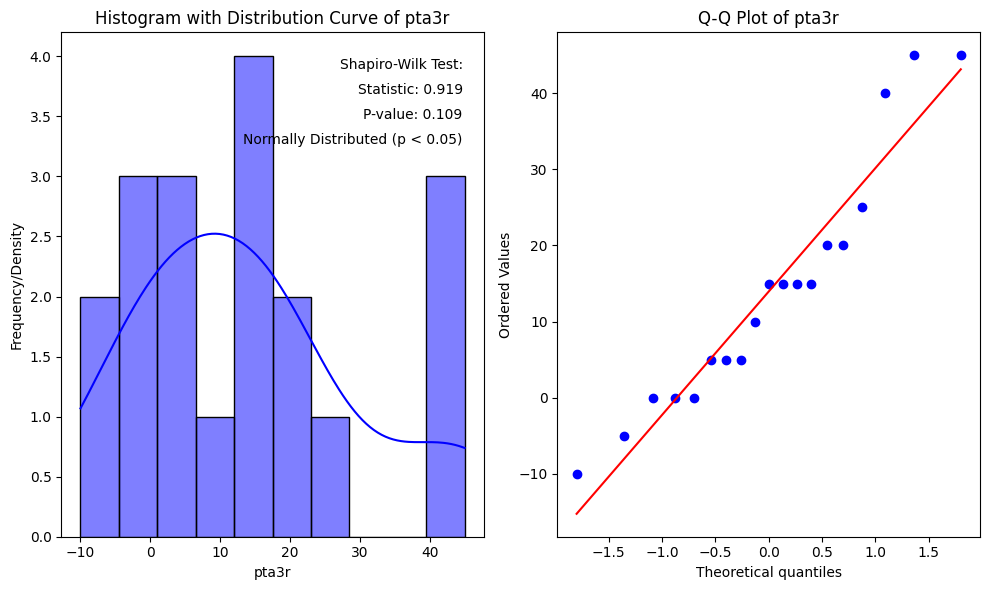

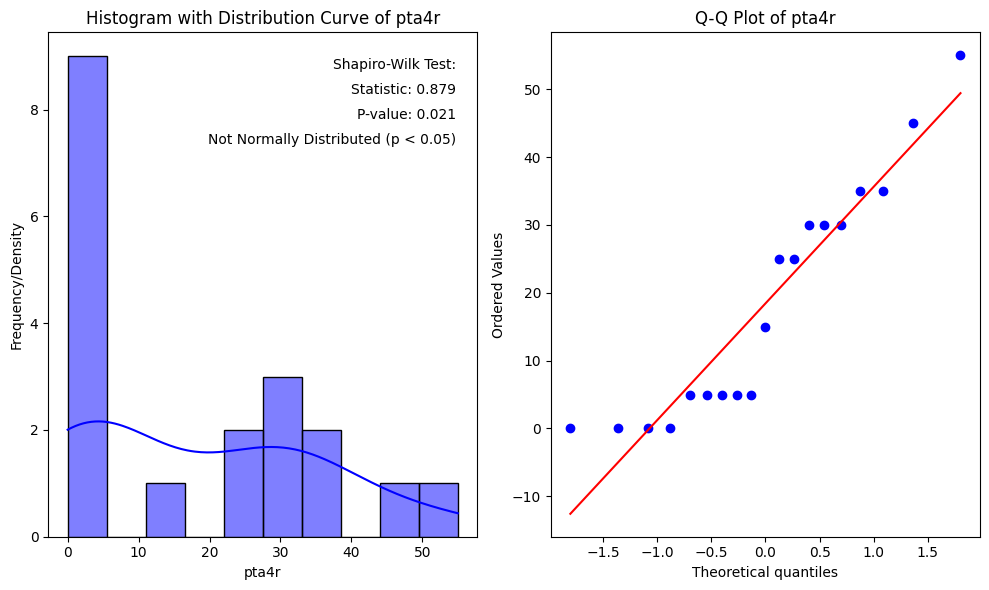

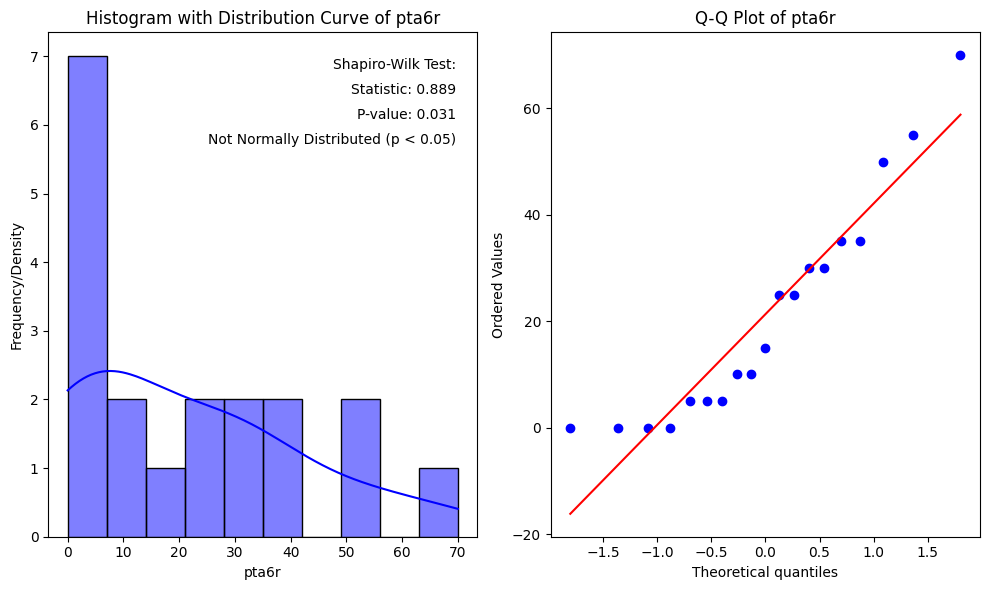

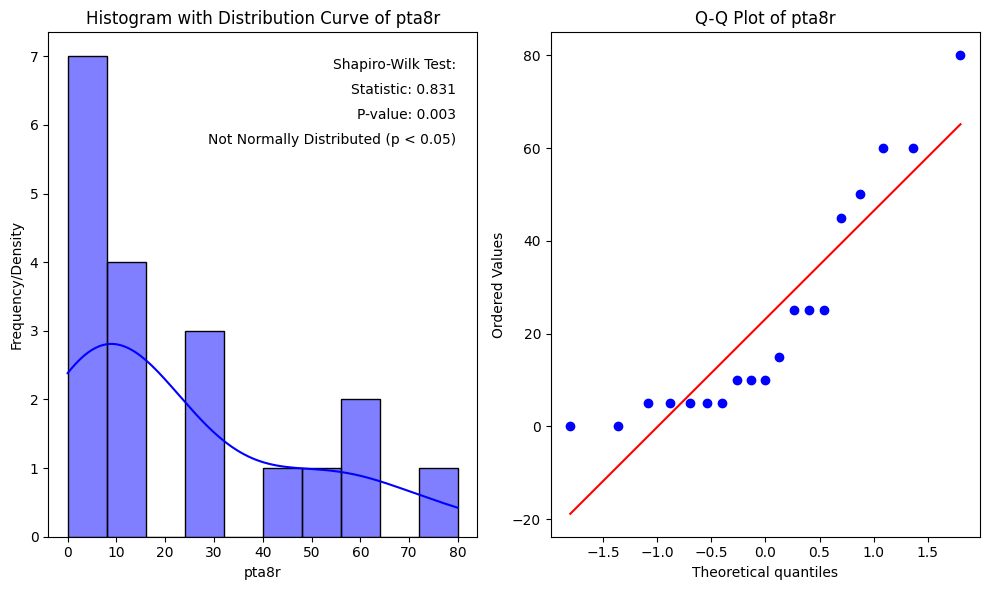

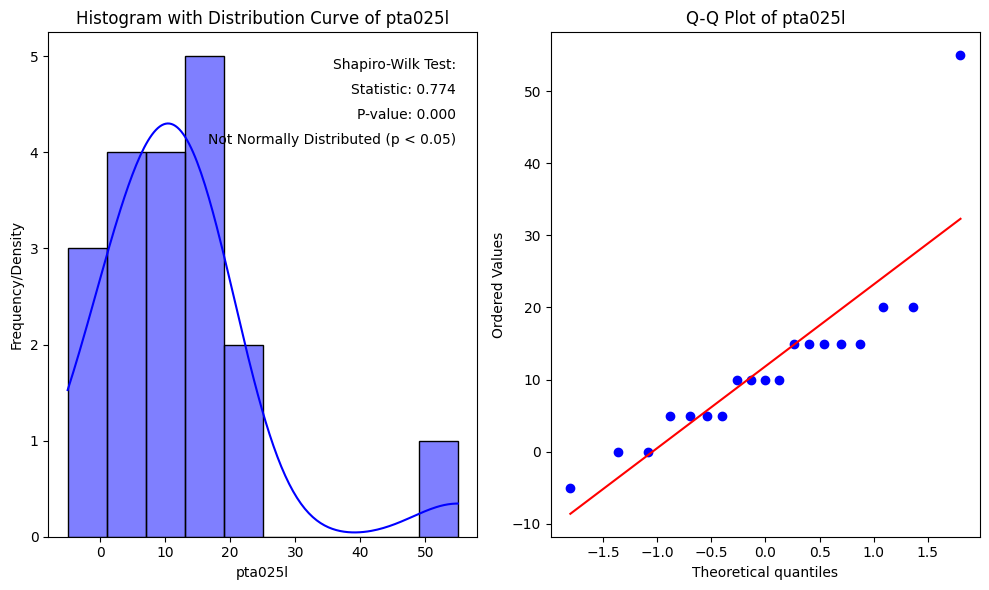

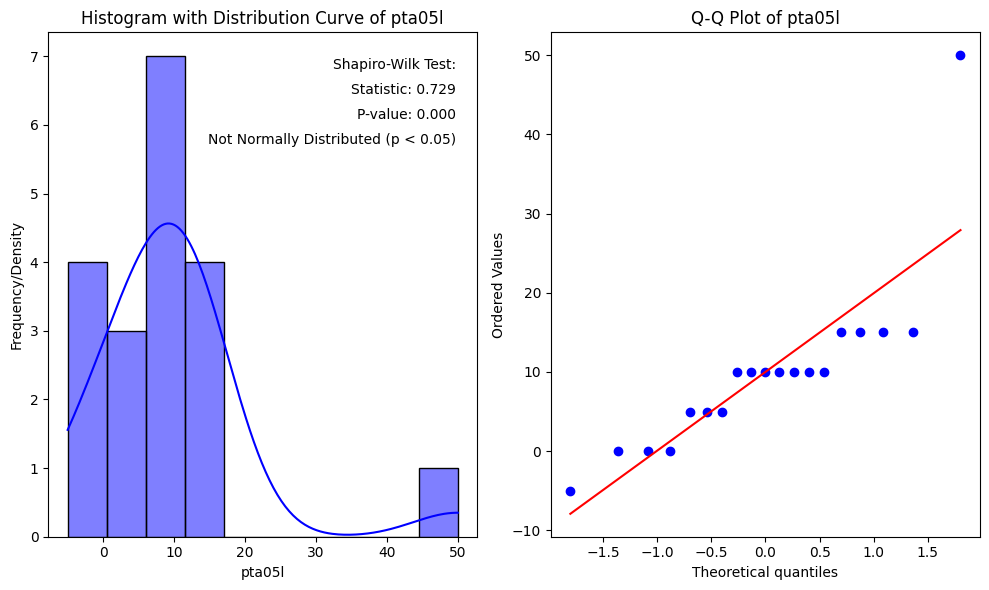

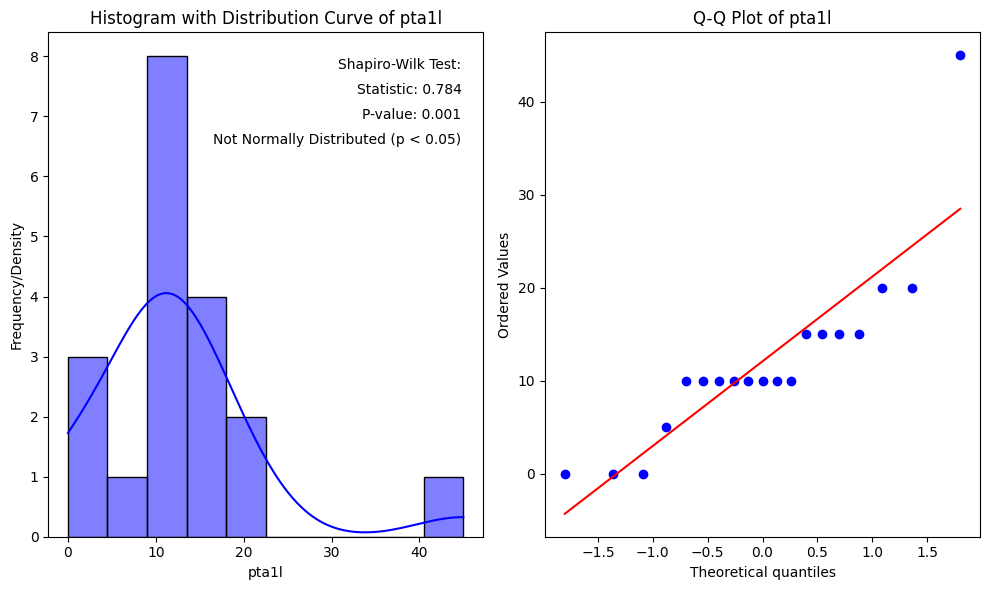

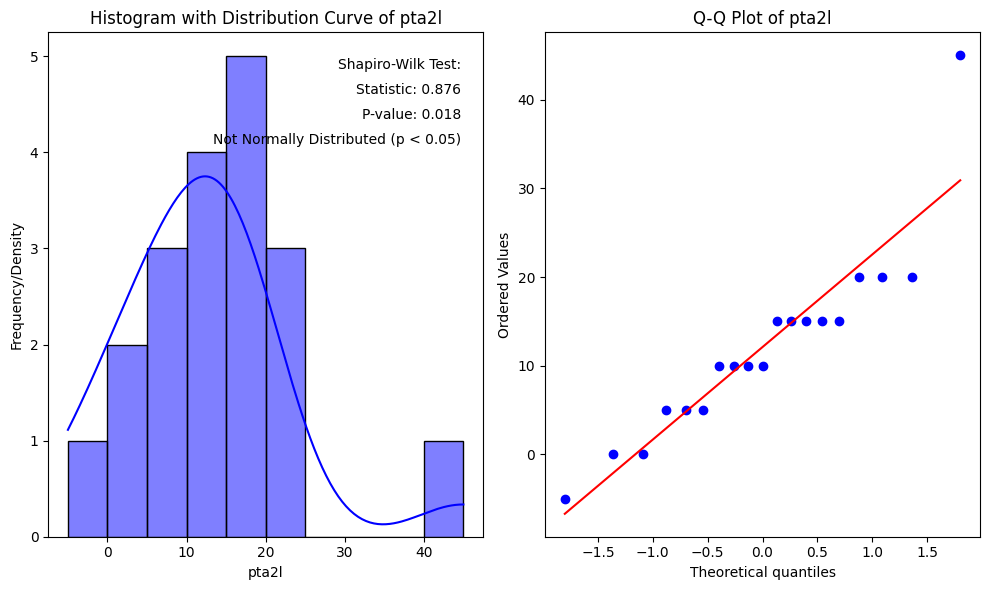

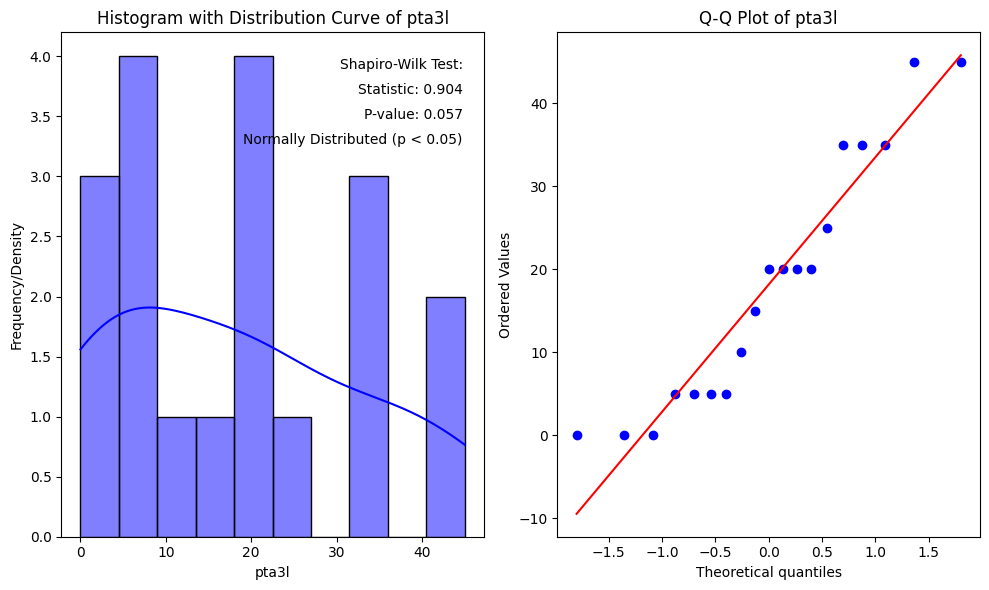

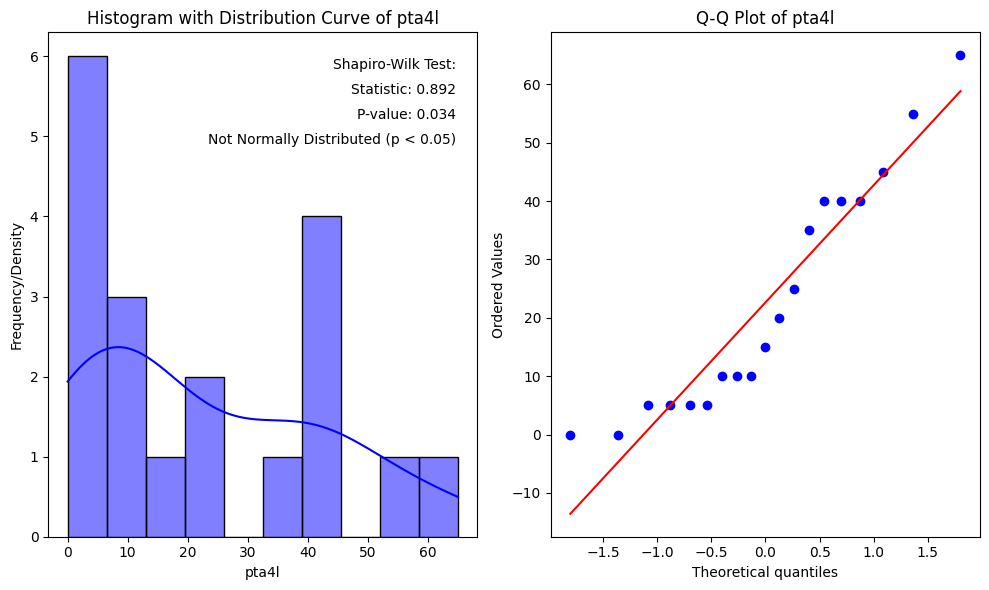

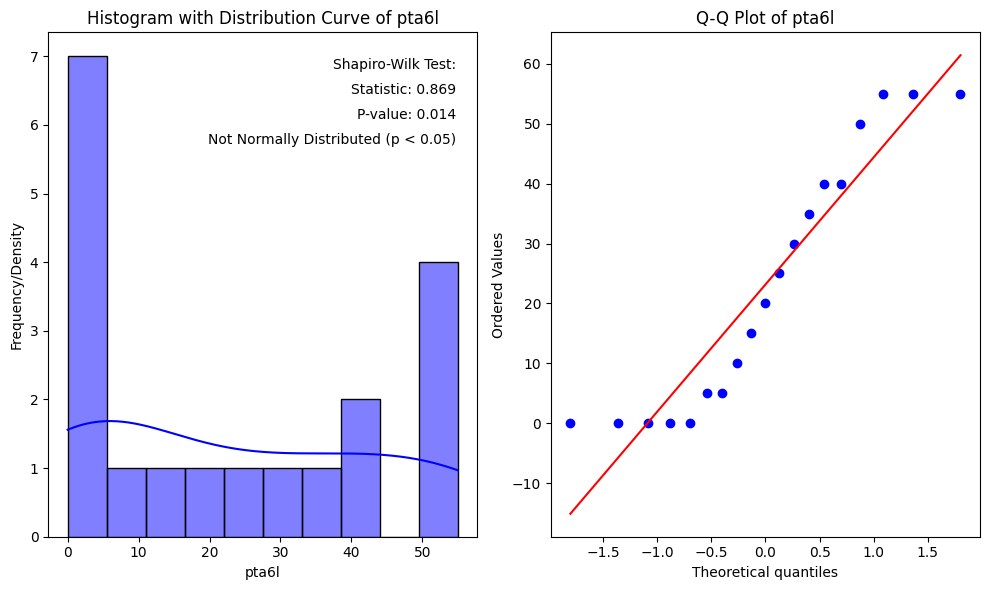

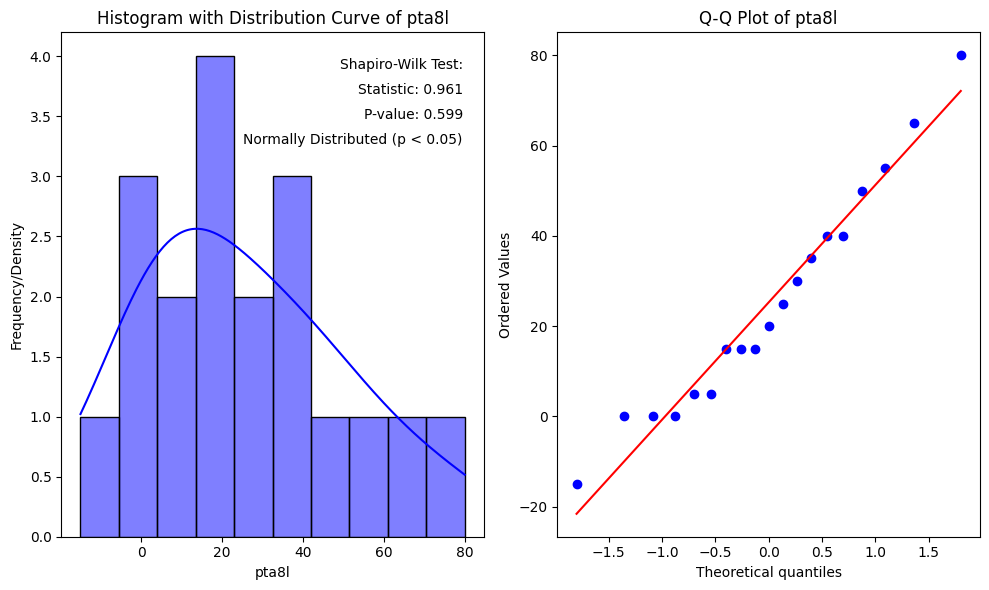

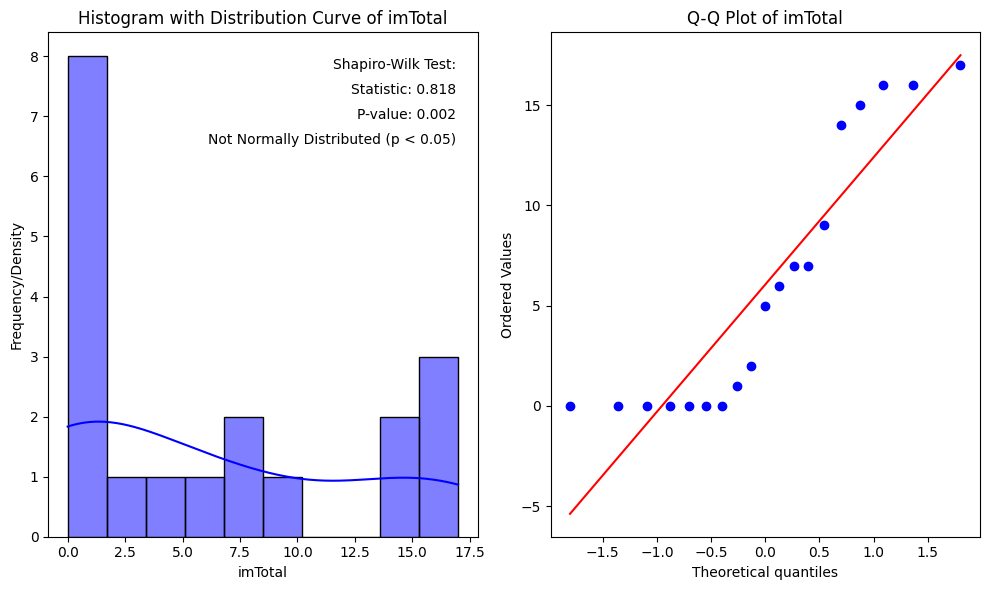

In [10]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from scipy.stats import shapiro, probplot

# Assuming you have already defined the 'columns' list and the 'df' DataFrame
df

#Theol

columns = df.columns.tolist()

# Set a colorful palette for the entire plot
sns.set_palette("husl")

# Create a PDF file to save the plots
pdf_file = "output_plots.pdf"
pdf_pages = PdfPages(pdf_file)

for i in columns:
    # Create a larger figure size to add padding
    plt.figure(figsize=(10, 6))

    # Plot 1: Histogram with Distribution Curve
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=i, kde=True, color='blue', bins=10,
                 line_kws={'color': 'red'})  # Set the color of the distribution curve to red
    plt.xlabel(i)
    plt.ylabel('Frequency/Density')
    plt.title('Histogram with Distribution Curve of ' + i)

    # Shapiro-Wilk normality test
    statistic_shapiro, p_value_shapiro = shapiro(df[i])
    alpha = 0.05

    if p_value_shapiro > alpha:
        distribution_text_shapiro = "Normally Distributed (p < 0.05)"
    else:
        distribution_text_shapiro = "Not Normally Distributed (p < 0.05)"

    # Add the Shapiro-Wilk test results to the plot
    plt.text(0.95, 0.95, "Shapiro-Wilk Test:", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.9, "Statistic: {:.3f}".format(statistic_shapiro), ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.85, "P-value: {:.3f}".format(p_value_shapiro), ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.8, distribution_text_shapiro, ha='right', va='top', transform=plt.gca().transAxes)

    # Plot 2: Q-Q Plot
    plt.subplot(1, 2, 2)
    probplot(df[i], plot=plt)
    plt.title('Q-Q Plot of ' + i)

   
    # Adjust spacing between subplots and add padding
    plt.subplots_adjust(top=0.9, bottom=0.2, left=0.07, right=0.95, wspace=0.3)

    # Save the current plot to the PDF file
    pdf_pages.savefig()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Close the PDF file after saving all the plots
pdf_pages.close()

## Converting to Ms Word

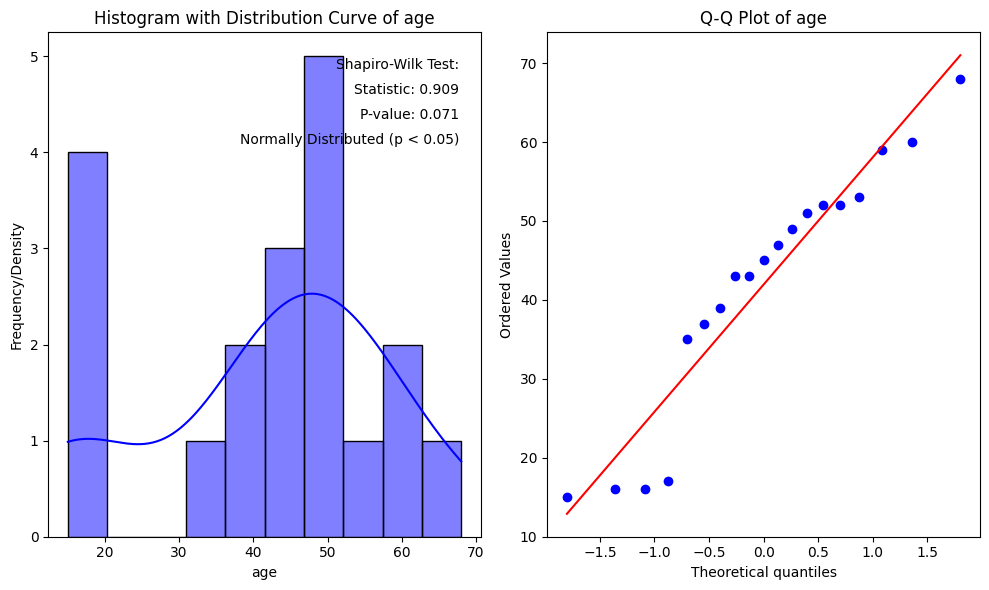

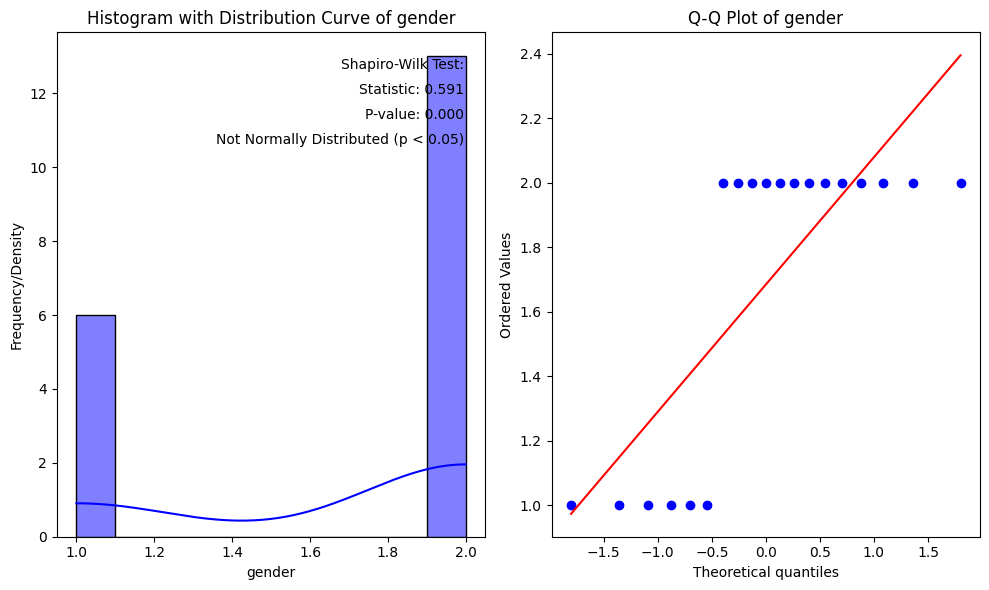

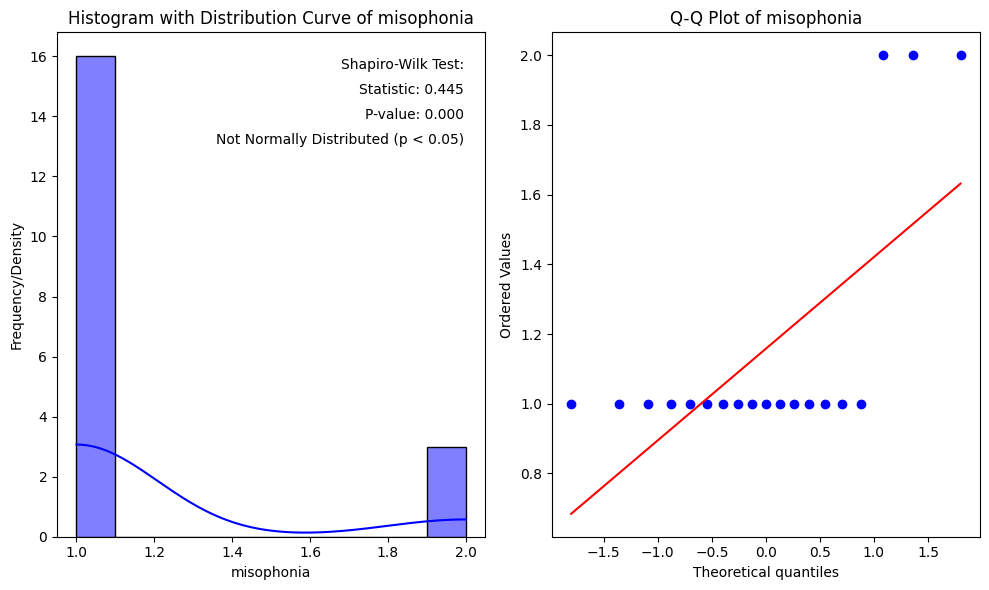

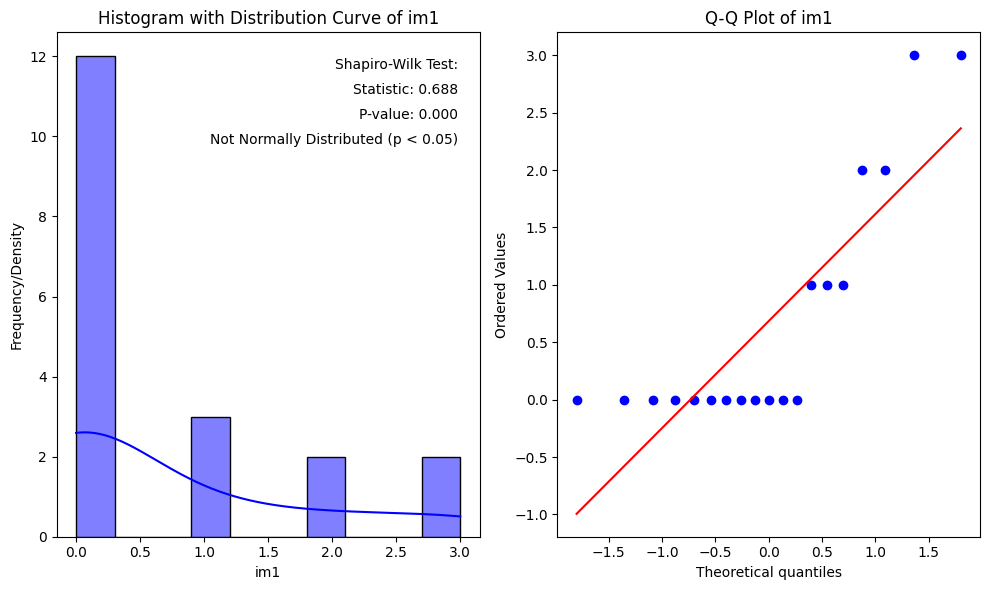

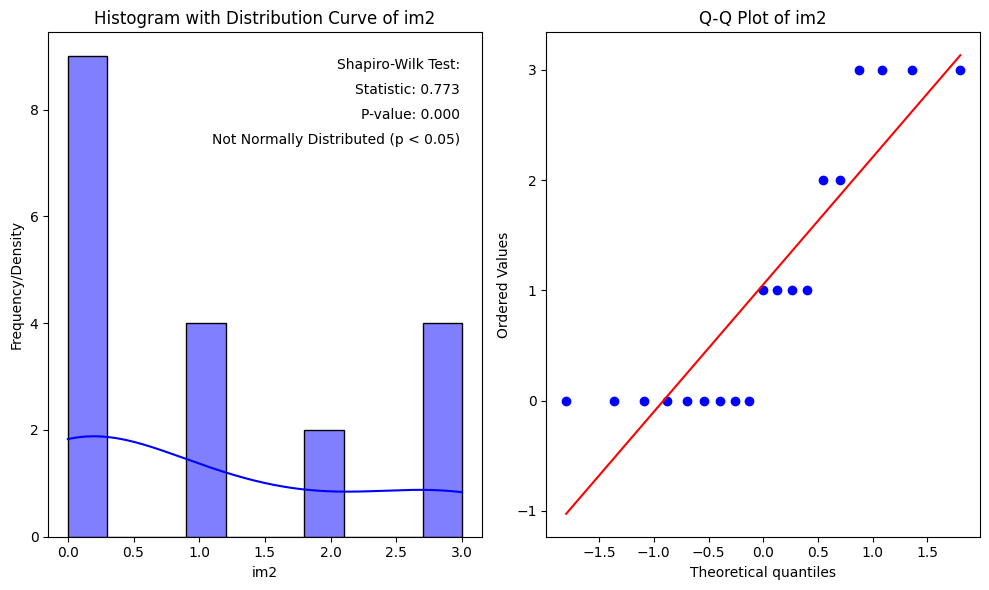

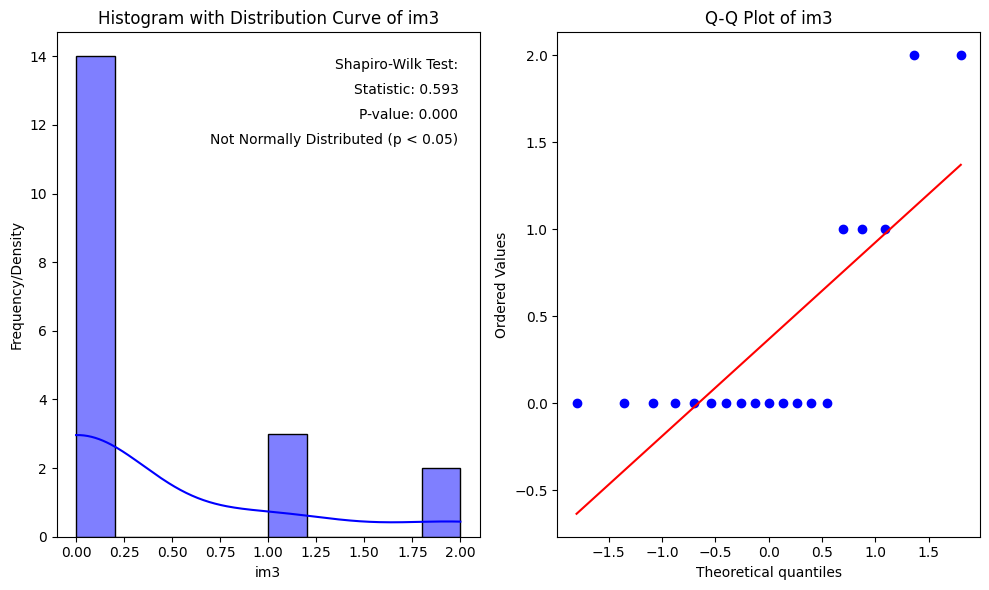

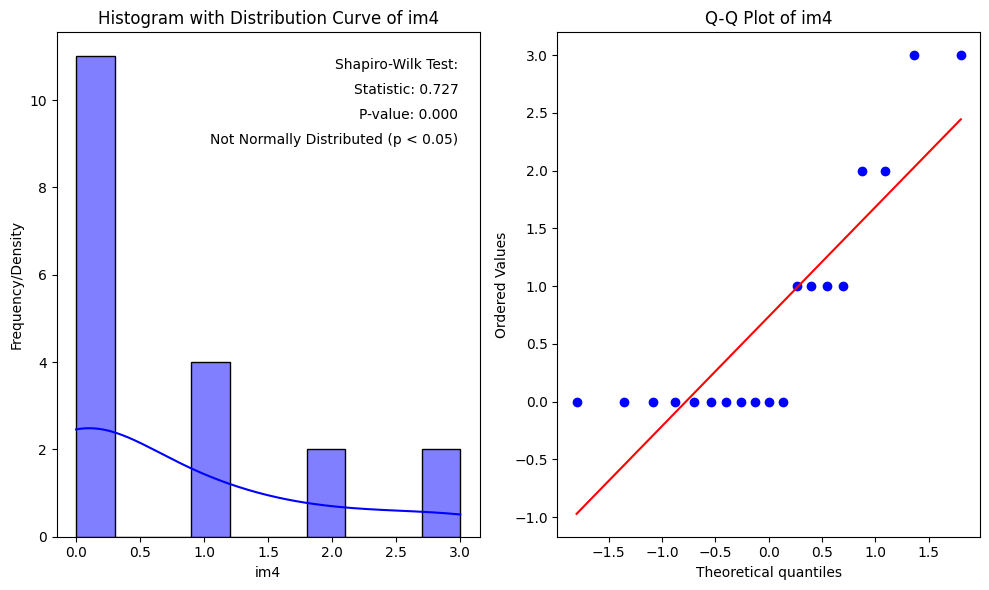

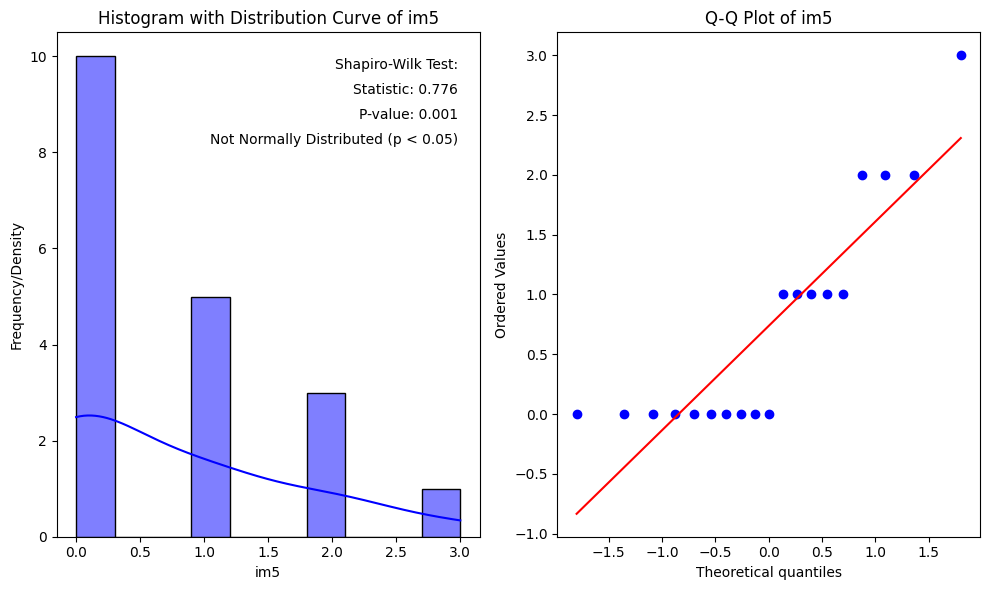

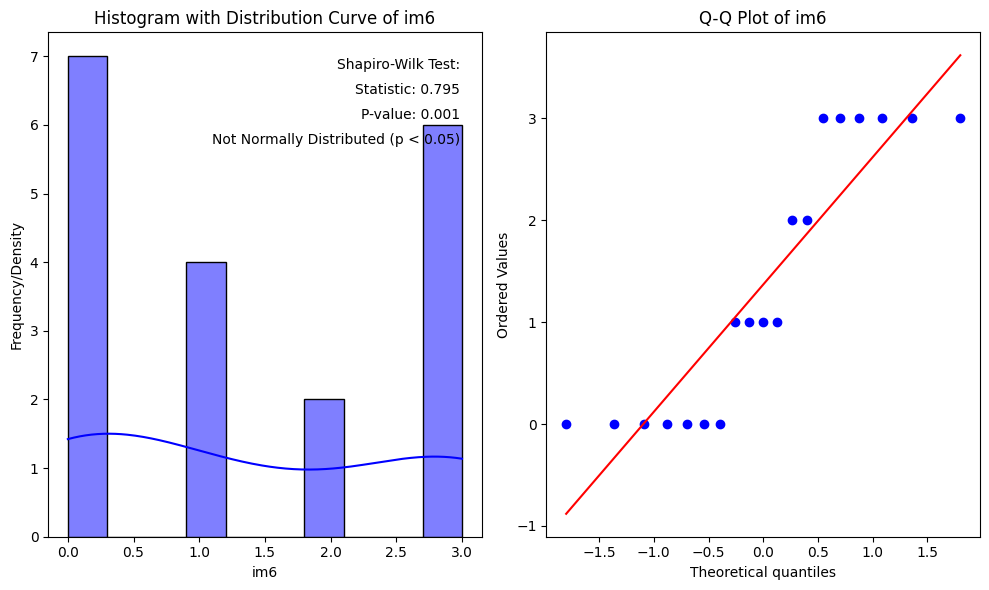

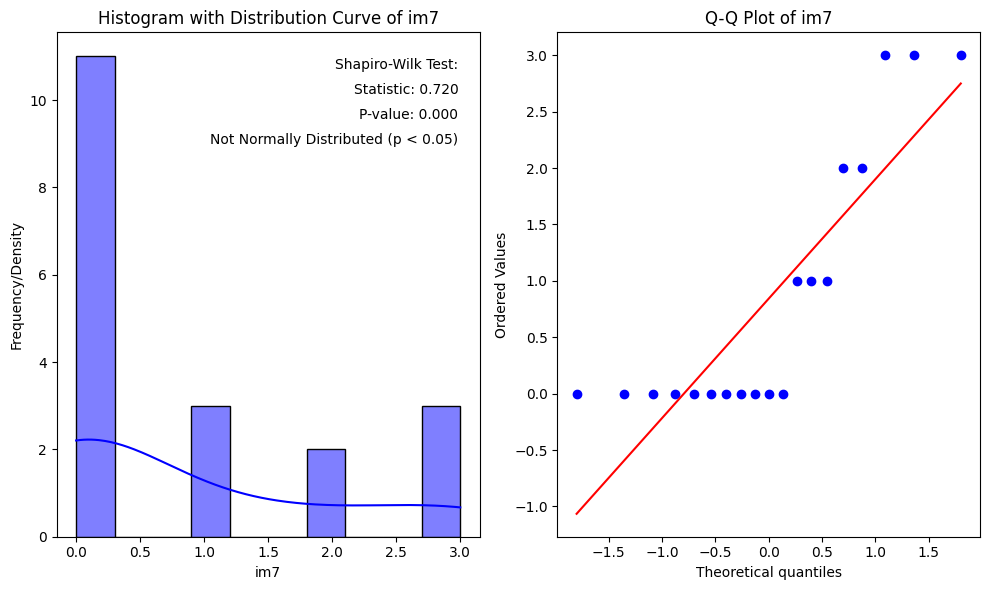

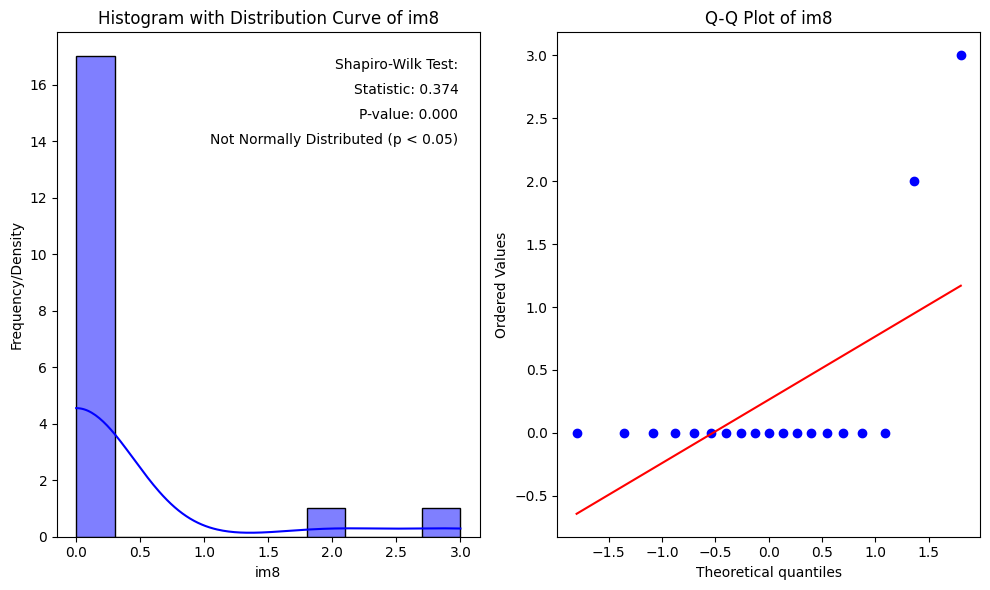

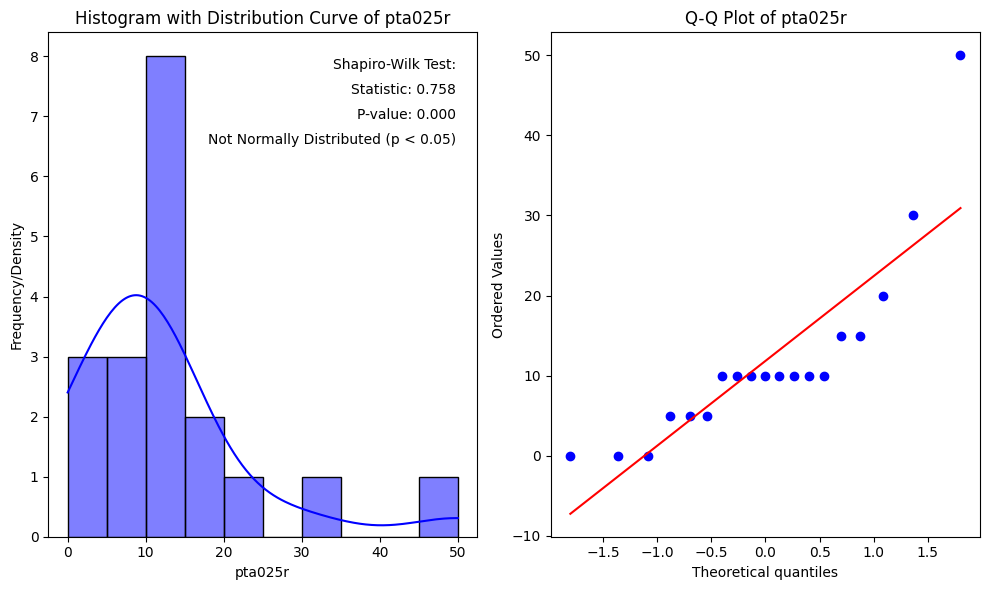

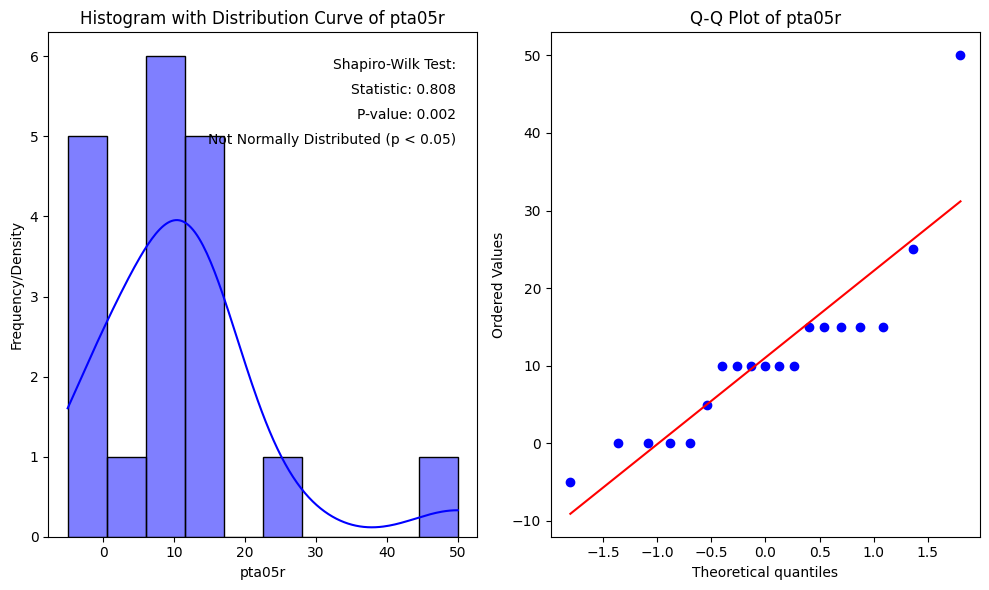

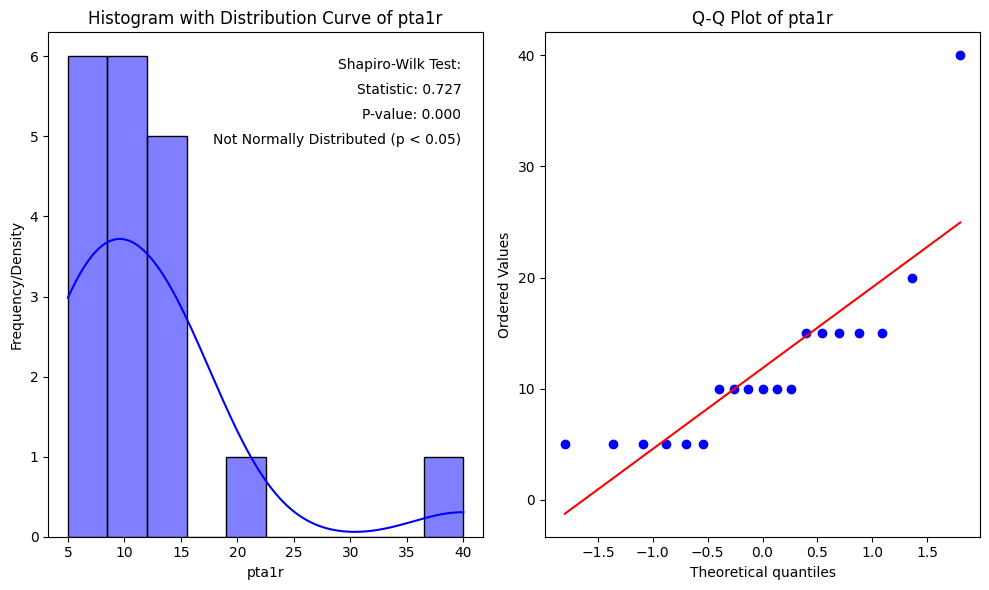

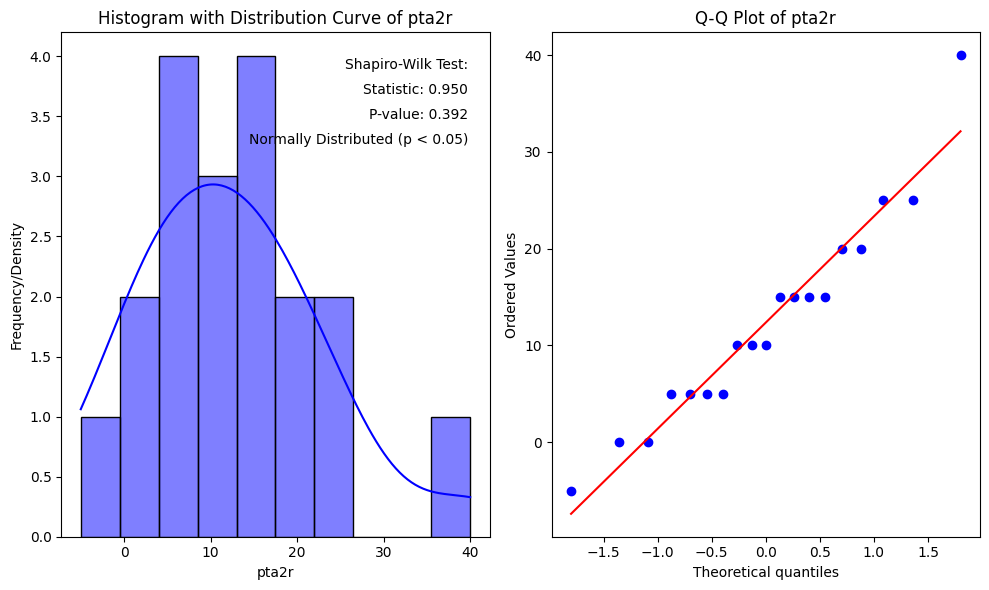

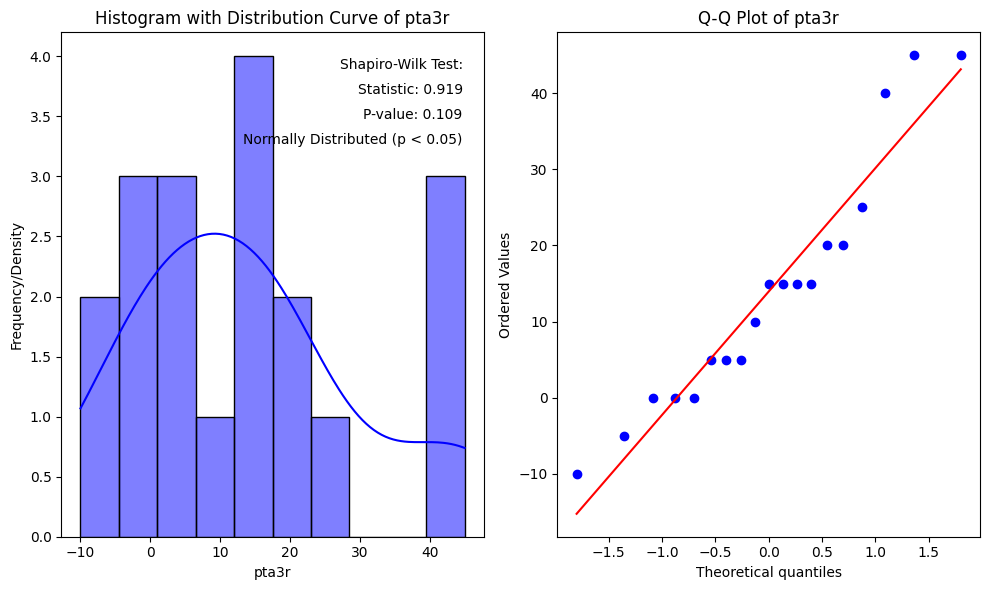

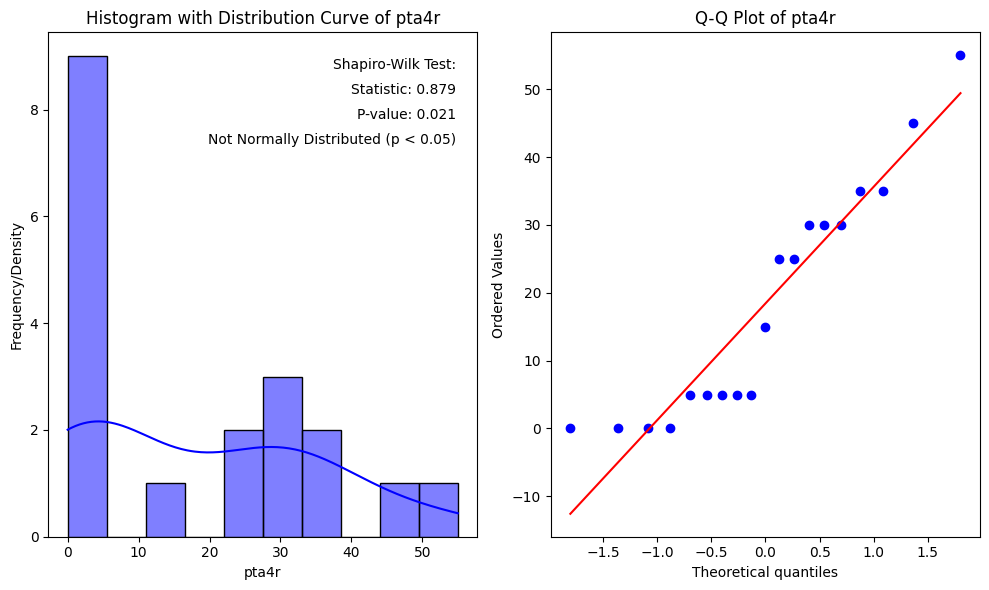

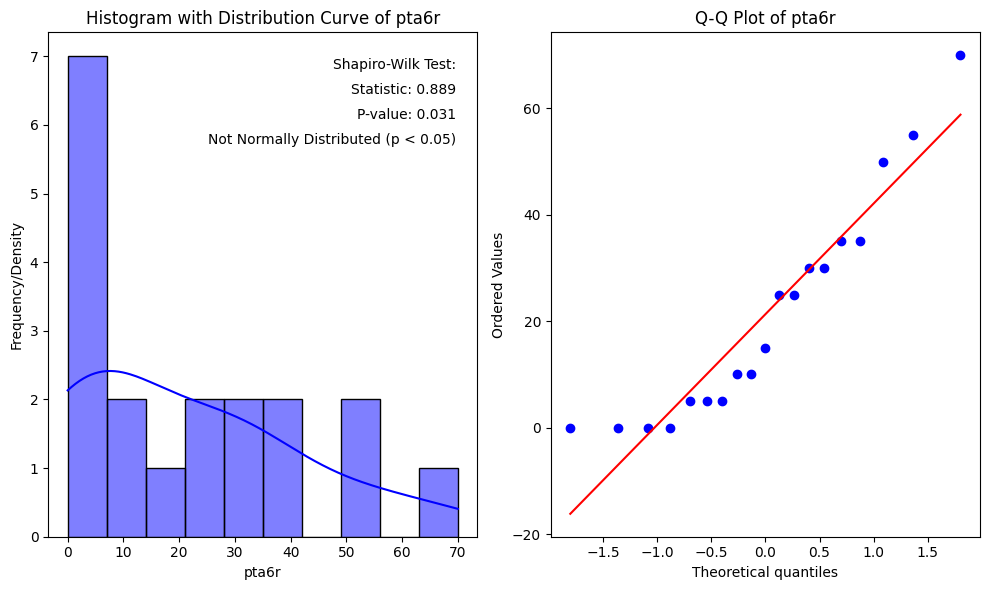

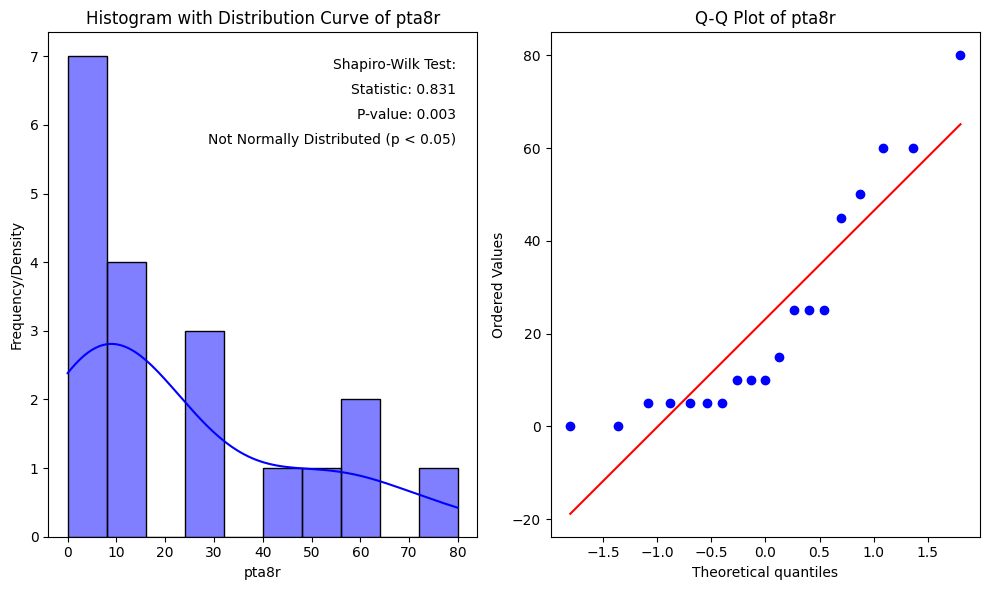

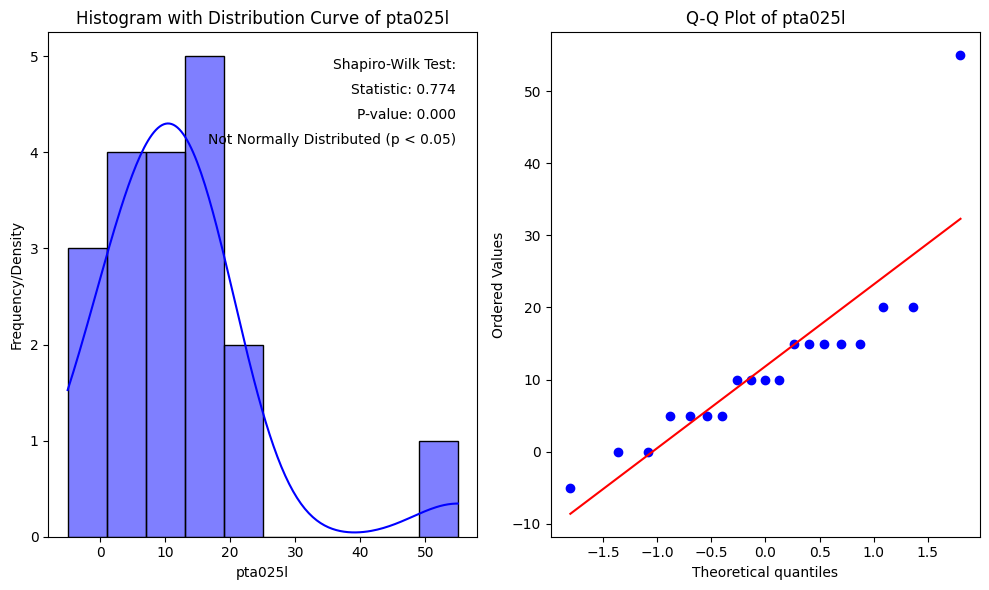

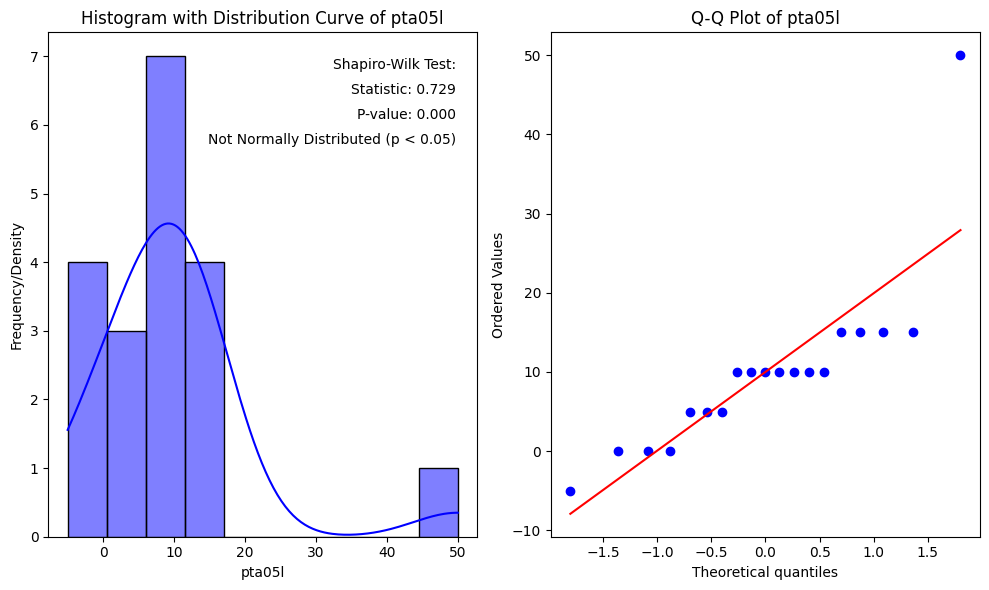

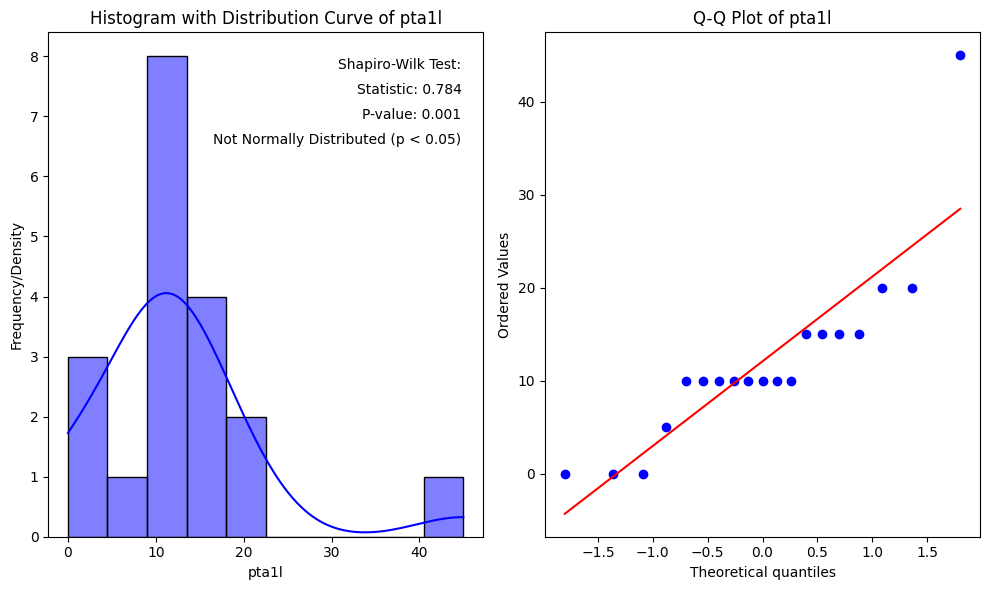

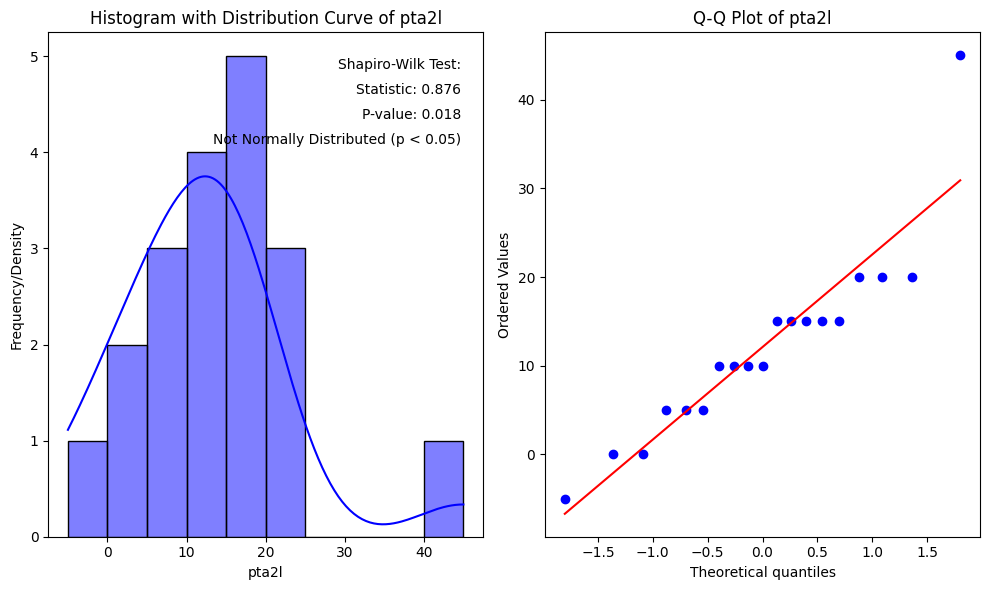

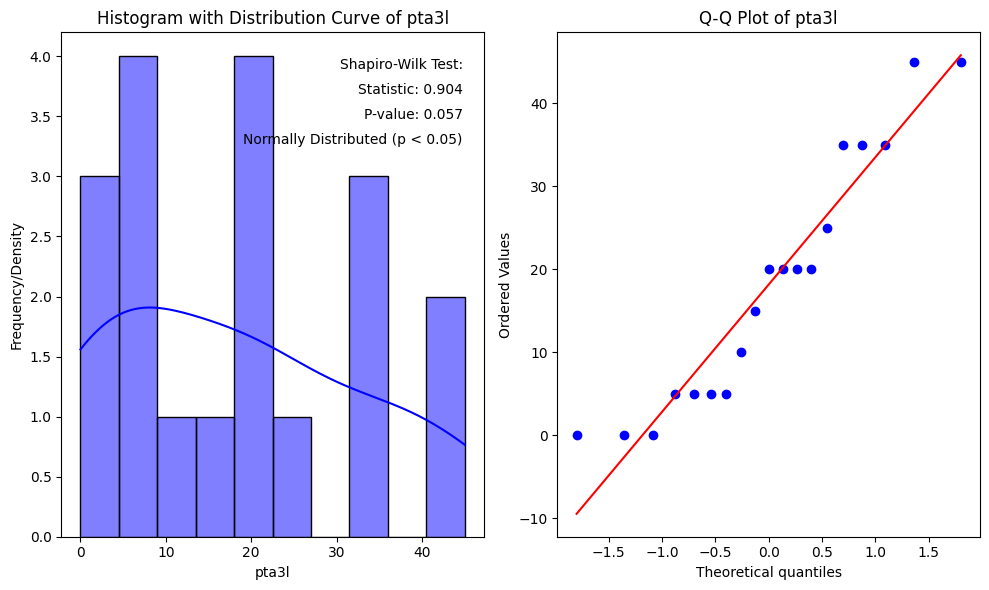

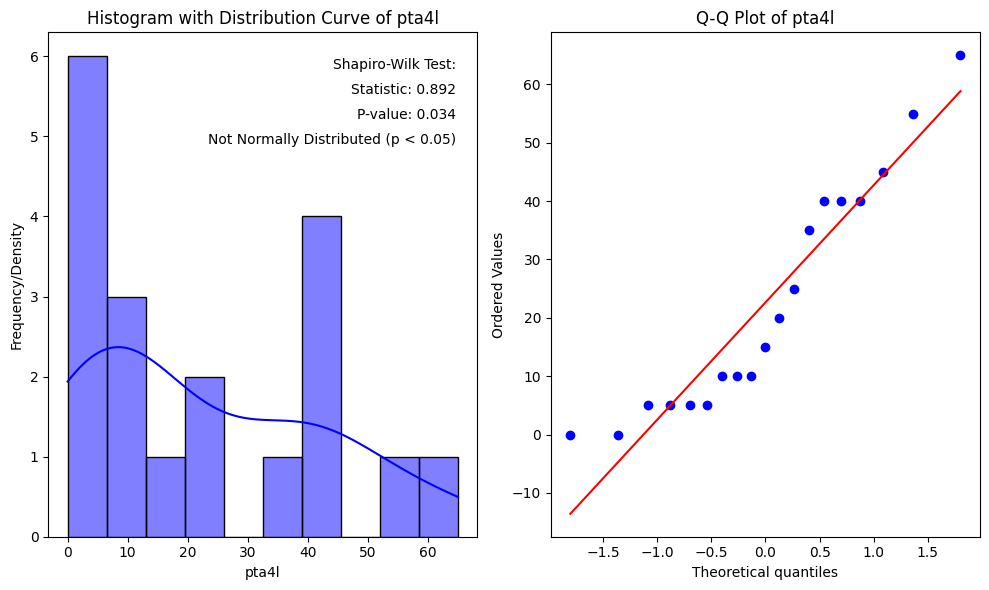

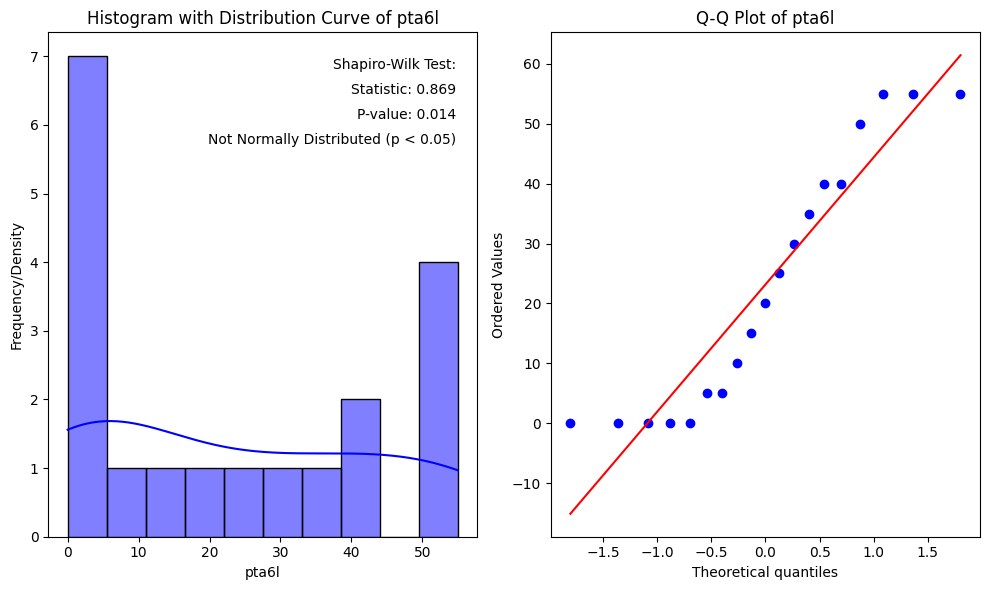

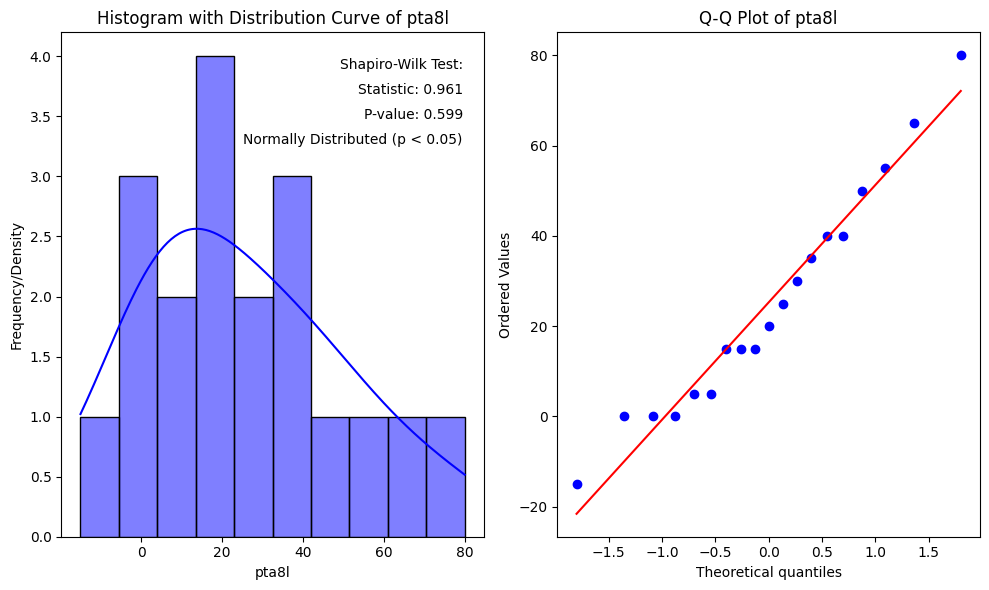

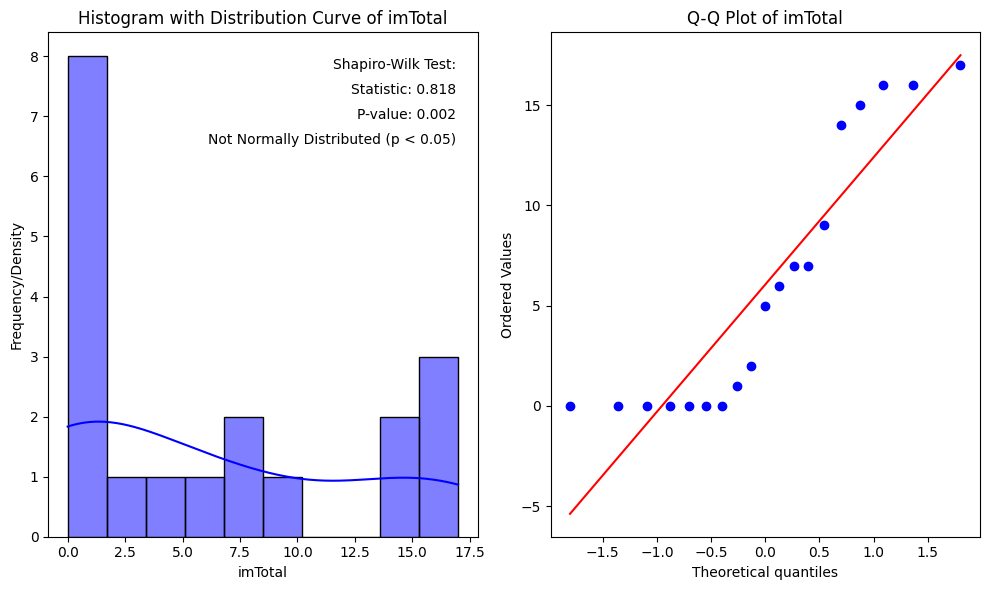

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import shapiro, probplot
from docx import Document
from docx.shared import Inches

# Assuming you have already defined the 'columns' list and the 'df' DataFrame

# Set a colorful palette for the entire plot
sns.set_palette("husl")

# Create a Microsoft Word document
doc = Document()

for i in columns:
    # Create a larger figure size to add padding
    plt.figure(figsize=(10, 6))

    # Plot 1: Histogram with Distribution Curve
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=i, kde=True, color='blue', bins=10,
                 line_kws={'color': 'red'})  # Set the color of the distribution curve to red
    plt.xlabel(i)
    plt.ylabel('Frequency/Density')
    plt.title('Histogram with Distribution Curve of ' + i)

    # Shapiro-Wilk normality test
    statistic_shapiro, p_value_shapiro = shapiro(df[i])
    alpha = 0.05

    if p_value_shapiro > alpha:
        distribution_text_shapiro = "Normally Distributed (p < 0.05)"
    else:
        distribution_text_shapiro = "Not Normally Distributed (p < 0.05)"

    # Add the Shapiro-Wilk test results to the plot
    plt.text(0.95, 0.95, "Shapiro-Wilk Test:", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.9, "Statistic: {:.3f}".format(statistic_shapiro), ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.85, "P-value: {:.3f}".format(p_value_shapiro), ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.8, distribution_text_shapiro, ha='right', va='top', transform=plt.gca().transAxes)

    # Plot 2: Q-Q Plot
    plt.subplot(1, 2, 2)
    probplot(df[i], plot=plt)
    plt.title('Q-Q Plot of ' + i)

  
    # Adjust spacing between subplots and add padding
    plt.subplots_adjust(top=0.9, bottom=0.2, left=0.07, right=0.95, wspace=0.3)

    # Save the current plot as an image (PNG)
    image_file = f"{i}_plot.png"
    plt.savefig(image_file)

    # Insert the image into the Word document
    doc.add_heading(f'Plots for {i}', level=1)
    doc.add_picture(image_file, width=Inches(5.5))

    # Show the plot
    plt.tight_layout()
    plt.show()

# Save the Word document
doc_file = "output_plots.docx"
doc.save(doc_file)


# Descriptive Statistics

In [12]:
# Dataset
df

# Display descriptive statistics for the first three columns
statistics = df.iloc[:, :3].describe()

print(statistics)


             age     gender  misophonia
count  19.000000  19.000000   19.000000
mean   41.947368   1.684211    1.157895
std    15.925080   0.477567    0.374634
min    15.000000   1.000000    1.000000
25%    36.000000   1.000000    1.000000
50%    45.000000   2.000000    1.000000
75%    52.000000   2.000000    1.000000
max    68.000000   2.000000    2.000000


In [13]:

import pandas as pd

# Create a sample DataFrame
df

# Define mapping dictionaries
Gender = {1: "Male", 2: "Female"}
Miso_p = {1: 'Misophonia', 2: "No Misophonia"}

df['gender'] = df['gender'].map(Gender)
df['misophonia'] = df['misophonia'].map(Miso_p)





In [14]:

# Calculate the frequency of each age, gender, and misophonia
age_counts = df['age'].value_counts()
gender_counts = df['gender'].value_counts()
misophonia_counts = df['misophonia'].value_counts()

desc_stats = ["age", "gender", "misophonia"]

for i in desc_stats:
    i_counts = df[i].value_counts() 
    i_percent = (i_counts / i_counts.sum()) * 100  # Calculate the percentage
    i_summary = pd.DataFrame({'Frequency': i_counts, 'Percentage': i_percent})
    print(f"Summary for {i}:")
    print(i_summary)

Summary for age:
     Frequency  Percentage
age                       
43           2   10.526316
52           2   10.526316
16           2   10.526316
53           1    5.263158
59           1    5.263158
35           1    5.263158
39           1    5.263158
17           1    5.263158
37           1    5.263158
68           1    5.263158
15           1    5.263158
47           1    5.263158
60           1    5.263158
45           1    5.263158
51           1    5.263158
49           1    5.263158
Summary for gender:
        Frequency  Percentage
gender                       
Female         13   68.421053
Male            6   31.578947
Summary for misophonia:
               Frequency  Percentage
misophonia                          
Misophonia            16   84.210526
No Misophonia          3   15.789474


In [15]:
df

age  gender     misophonia  im1  im2  im3  im4  im5  im6  im7  ...  pta8r  \
0    53  Female     Misophonia    3    3    0    3    0    3    3  ...     60   
1    59    Male     Misophonia    1    1    0    1    1    1    0  ...     80   
2    35    Male     Misophonia    0    3    1    1    2    3    3  ...      5   
3    39    Male     Misophonia    0    0    0    0    0    0    0  ...      5   
4    43    Male  No Misophonia    0    1    0    0    0    1    0  ...     15   
5    17  Female     Misophonia    0    3    2    0    1    3    0  ...      5   
6    37  Female     Misophonia    0    0    0    0    0    0    0  ...     10   
7    43  Female     Misophonia    0    0    0    0    0    1    0  ...     50   
8    52  Female     Misophonia    0    0    0    0    0    0    0  ...     25   
9    68  Female     Misophonia    0    0    0    0    0    0    0  ...     60   
10   52    Male     Misophonia    0    0    0    0    0    0    0  ...      5   
11   15  Female     Misophonia    0    1    0    1    1    3    1  ...      0   
12   47  Female  No Misophonia    0    0    0    0    0    0    0  ...     10   
13   60  Female  No Misophonia    0    0    0    0    0    0    0  ...     25   
14   45  Female     Misophonia    1    1    1    1    1    1    1  ...     45   
15   16  Female     Misophonia    1    2    1    2    3    3    2  ...     10   
16   51    Male     Misophonia    2    0    0    0    1    2    1  ...     25   
17   49  Female     Misophonia    2    2    2    2    2    2    2  ...      5   
18   16  Female     Misophonia    3    3    0    3    2    3    3  ...      0   

    pta025l  pta05l  pta1l  pta2l  pta3l  pta4l  pta6l  pta8l  imTotal  
0        20      15     15     15   35.0     40   55.0     65       15  
1        55      50     45     45   45.0     55   55.0     80        5  
2         5       5     10     10    5.0      5    5.0      5       16  
3         5       0      0     20   10.0     10    0.0    -15        0  
4        15      15     10     10   35.0     45   40.0     35        2  
5        15      10     10      0    0.0     10    0.0      0        9  
6        10      10     10      5    0.0      5    0.0      5        0  
7        -5       0     20     15   20.0     25   50.0     50        1  
8        10      10     10     20   20.0     20   25.0     30        0  
9        15      10     15     10   35.0     40   35.0     55        0  
10       10       5     10     10   25.0     40   30.0     15        0  
11        5       5      0      0    5.0      0   15.0     15        7  
12       15      10     10     15   15.0      5   10.0     15        0  
13        0      10     20     15   45.0     65   55.0     40        0  
14       10      10     15     20   20.0     15   20.0     25        7  
15       20      15     10      5    0.0      0    0.0      0       14  
16       15      15     15     15   20.0     35   40.0     40        6  
17        0       0      5     -5    5.0     10    5.0     20       16  
18        5      -5      0      5    5.0      5    0.0      0       17  

[19 rows x 28 columns]

In [16]:
df.head(3)

age  gender  misophonia  im1  im2  im3  im4  im5  im6  im7  ...  pta8r  \
0   53  Female  Misophonia    3    3    0    3    0    3    3  ...     60   
1   59    Male  Misophonia    1    1    0    1    1    1    0  ...     80   
2   35    Male  Misophonia    0    3    1    1    2    3    3  ...      5   

   pta025l  pta05l  pta1l  pta2l  pta3l  pta4l  pta6l  pta8l  imTotal  
0       20      15     15     15   35.0     40   55.0     65       15  
1       55      50     45     45   45.0     55   55.0     80        5  
2        5       5     10     10    5.0      5    5.0      5       16  

[3 rows x 28 columns]

In [17]:
df.columns

Index(['age', 'gender', 'misophonia', 'im1', 'im2', 'im3', 'im4', 'im5', 'im6',
       'im7', 'im8', 'pta025r', 'pta05r', 'pta1r', 'pta2r', 'pta3r', 'pta4r',
       'pta6r', 'pta8r', 'pta025l', 'pta05l', 'pta1l', 'pta2l', 'pta3l',
       'pta4l', 'pta6l', 'pta8l', 'imTotal'],
      dtype='object')

In [18]:
df

age  gender     misophonia  im1  im2  im3  im4  im5  im6  im7  ...  pta8r  \
0    53  Female     Misophonia    3    3    0    3    0    3    3  ...     60   
1    59    Male     Misophonia    1    1    0    1    1    1    0  ...     80   
2    35    Male     Misophonia    0    3    1    1    2    3    3  ...      5   
3    39    Male     Misophonia    0    0    0    0    0    0    0  ...      5   
4    43    Male  No Misophonia    0    1    0    0    0    1    0  ...     15   
5    17  Female     Misophonia    0    3    2    0    1    3    0  ...      5   
6    37  Female     Misophonia    0    0    0    0    0    0    0  ...     10   
7    43  Female     Misophonia    0    0    0    0    0    1    0  ...     50   
8    52  Female     Misophonia    0    0    0    0    0    0    0  ...     25   
9    68  Female     Misophonia    0    0    0    0    0    0    0  ...     60   
10   52    Male     Misophonia    0    0    0    0    0    0    0  ...      5   
11   15  Female     Misophonia    0    1    0    1    1    3    1  ...      0   
12   47  Female  No Misophonia    0    0    0    0    0    0    0  ...     10   
13   60  Female  No Misophonia    0    0    0    0    0    0    0  ...     25   
14   45  Female     Misophonia    1    1    1    1    1    1    1  ...     45   
15   16  Female     Misophonia    1    2    1    2    3    3    2  ...     10   
16   51    Male     Misophonia    2    0    0    0    1    2    1  ...     25   
17   49  Female     Misophonia    2    2    2    2    2    2    2  ...      5   
18   16  Female     Misophonia    3    3    0    3    2    3    3  ...      0   

    pta025l  pta05l  pta1l  pta2l  pta3l  pta4l  pta6l  pta8l  imTotal  
0        20      15     15     15   35.0     40   55.0     65       15  
1        55      50     45     45   45.0     55   55.0     80        5  
2         5       5     10     10    5.0      5    5.0      5       16  
3         5       0      0     20   10.0     10    0.0    -15        0  
4        15      15     10     10   35.0     45   40.0     35        2  
5        15      10     10      0    0.0     10    0.0      0        9  
6        10      10     10      5    0.0      5    0.0      5        0  
7        -5       0     20     15   20.0     25   50.0     50        1  
8        10      10     10     20   20.0     20   25.0     30        0  
9        15      10     15     10   35.0     40   35.0     55        0  
10       10       5     10     10   25.0     40   30.0     15        0  
11        5       5      0      0    5.0      0   15.0     15        7  
12       15      10     10     15   15.0      5   10.0     15        0  
13        0      10     20     15   45.0     65   55.0     40        0  
14       10      10     15     20   20.0     15   20.0     25        7  
15       20      15     10      5    0.0      0    0.0      0       14  
16       15      15     15     15   20.0     35   40.0     40        6  
17        0       0      5     -5    5.0     10    5.0     20       16  
18        5      -5      0      5    5.0      5    0.0      0       17  

[19 rows x 28 columns]

In [19]:
df.columns

Index(['age', 'gender', 'misophonia', 'im1', 'im2', 'im3', 'im4', 'im5', 'im6',
       'im7', 'im8', 'pta025r', 'pta05r', 'pta1r', 'pta2r', 'pta3r', 'pta4r',
       'pta6r', 'pta8r', 'pta025l', 'pta05l', 'pta1l', 'pta2l', 'pta3l',
       'pta4l', 'pta6l', 'pta8l', 'imTotal'],
      dtype='object')

# Correlation Analysis of HTLS and Misophonia Impact

## Ho1: Misophonia Impact vs HTLs (pta025r and pta025l)

In [20]:
import pandas as pd
from scipy.stats import spearmanr

# Assuming you have a dataframe named 'df' with the given columns
data = {
    'imTotal': df['imTotal'],
    'pta025r': df['pta025r'],
    'pta025l': df['pta025l']
}

new_df = pd.DataFrame(data)

# Calculate Spearman correlation and p-value
corr_imTotal_pta025r, p_value_imTotal_pta025r = spearmanr(new_df['imTotal'], new_df['pta025r'])
corr_imTotal_pta025l, p_value_imTotal_pta025l = spearmanr(new_df['imTotal'], new_df['pta025l'])

alpha = 0.05  # Significance level

print("Spearman Correlation between imTotal and pta025r:", format(corr_imTotal_pta025r, '.3f'))
print("p-value for the correlation:", format(p_value_imTotal_pta025r, '.3f'))
if p_value_imTotal_pta025r < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")

print("\nSpearman Correlation between imTotal and pta025l:", format(corr_imTotal_pta025l, '.3f'))
print("p-value for the correlation:", format(p_value_imTotal_pta025l, '.3f'))
if p_value_imTotal_pta025l < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")


Spearman Correlation between imTotal and pta025r: -0.016
p-value for the correlation: 0.948
Fail to reject the null hypothesis. There is no significant correlation.

Spearman Correlation between imTotal and pta025l: 0.012
p-value for the correlation: 0.961
Fail to reject the null hypothesis. There is no significant correlation.


## Scatter Plot for the association between Misophonia Impact and HTLs(0.25kHz)

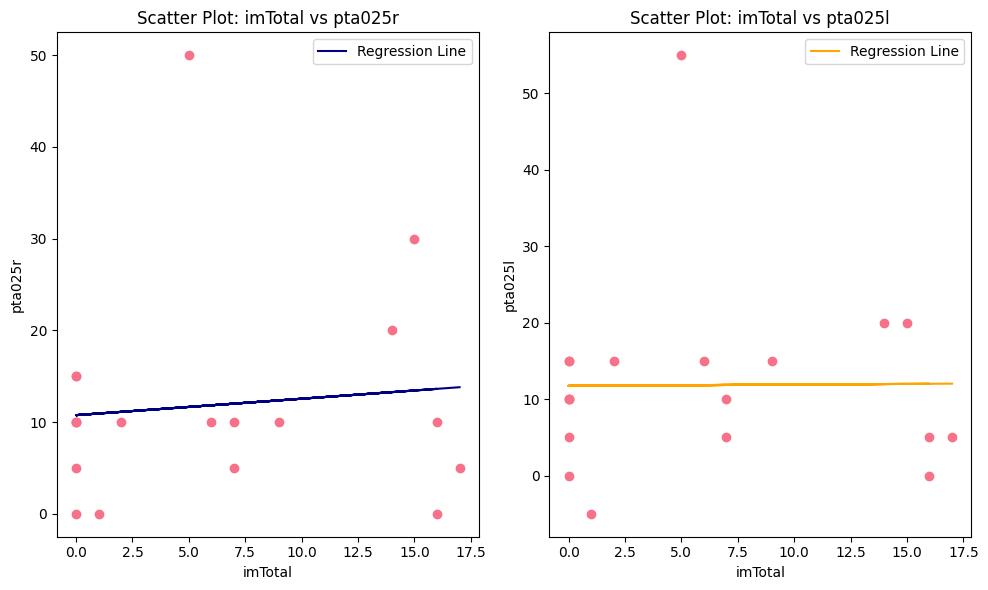

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'df' with the given columns
data = {
    'imTotal': df['imTotal'],
    'pta025r': df['pta025r'],
    'pta025l': df['pta025l']
}

new_df = pd.DataFrame(data)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(new_df['imTotal'], new_df['pta025r'], alpha=1)
slope, intercept, r_value, p_value, std_err = linregress(new_df['imTotal'], new_df['pta025r'])
plt.plot(new_df['imTotal'], slope * new_df['imTotal'] + intercept, color='navy', label='Regression Line')
plt.xlabel('imTotal')
plt.ylabel('pta025r')
plt.title('Scatter Plot: imTotal vs pta025r')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(new_df['imTotal'], new_df['pta025l'], alpha=1)
slope, intercept, r_value, p_value, std_err = linregress(new_df['imTotal'], new_df['pta025l'])
plt.plot(new_df['imTotal'], slope * new_df['imTotal'] + intercept, color='orange', label='Regression Line')
plt.xlabel('imTotal')
plt.ylabel('pta025l')
plt.title('Scatter Plot: imTotal vs pta025l')
plt.legend()

plt.tight_layout()
plt.savefig("pta025_scatter_plot")
plt.show()


## Ho2: Misophonia Impact vs HTLs (pta05r and pta05l)

In [22]:
import pandas as pd
from scipy.stats import spearmanr

# Assuming you have a dataframe named 'df' with the given columns
data = {
    'imTotal': df['imTotal'],
    'pta05r': df['pta05r'],
    'pta05l': df['pta05l']
}

new_df = pd.DataFrame(data)

# Calculate Spearman correlation and p-value
corr_imTotal_pta05r, p_value_imTotal_pta05r = spearmanr(new_df['imTotal'], new_df['pta05r'])
corr_imTotal_pta05l, p_value_imTotal_pta05l = spearmanr(new_df['imTotal'], new_df['pta05l'])

alpha = 0.05  # Significance level

print("Spearman Correlation between imTotal and pta05r:", format(corr_imTotal_pta05r, '.3f'))
print("p-value for the correlation:", format(p_value_imTotal_pta05r, '.3f'))
if p_value_imTotal_pta05r < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")

print("\nSpearman Correlation between imTotal and pta05l:", format(corr_imTotal_pta05l, '.3f'))
print("p-value for the correlation:", format(p_value_imTotal_pta05l, '.3f'))
if p_value_imTotal_pta05l < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")


Spearman Correlation between imTotal and pta05r: -0.170
p-value for the correlation: 0.486
Fail to reject the null hypothesis. There is no significant correlation.

Spearman Correlation between imTotal and pta05l: -0.085
p-value for the correlation: 0.730
Fail to reject the null hypothesis. There is no significant correlation.


## Scatter Plot for the association between Misophonia Impact and HTLs(0.5kHz)

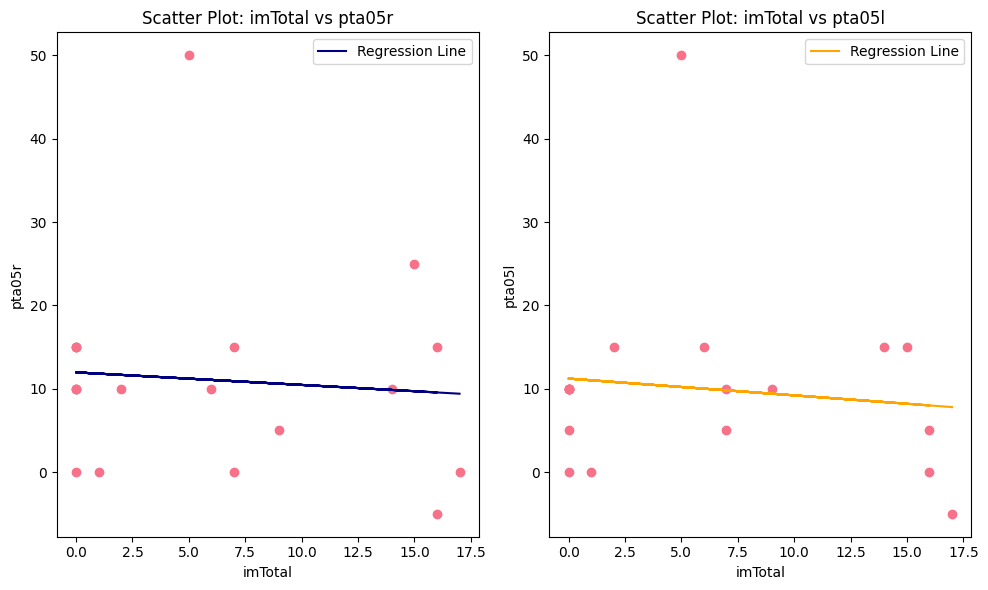

In [23]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'df' with the given columns
data = {
    'imTotal': df['imTotal'],
    'pta05r': df['pta05r'],
    'pta05l': df['pta05l']
}

new_df = pd.DataFrame(data)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(new_df['imTotal'], new_df['pta05r'], alpha=1)
slope, intercept, r_value, p_value, std_err = linregress(new_df['imTotal'], new_df['pta05r'])
plt.plot(new_df['imTotal'], slope * new_df['imTotal'] + intercept, color='navy', label='Regression Line')
plt.xlabel('imTotal')
plt.ylabel('pta05r')
plt.title('Scatter Plot: imTotal vs pta05r')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(new_df['imTotal'], new_df['pta05l'], alpha=1)
slope, intercept, r_value, p_value, std_err = linregress(new_df['imTotal'], new_df['pta05l'])
plt.plot(new_df['imTotal'], slope * new_df['imTotal'] + intercept, color='orange', label='Regression Line')
plt.xlabel('imTotal')
plt.ylabel('pta05l')
plt.title('Scatter Plot: imTotal vs pta05l')
plt.legend()

plt.tight_layout()
plt.savefig("pta05_scatter_plot")
plt.show()


## Ho3: Misophonia Impact vs HTLs (pta1r and pta1l)

In [24]:
import pandas as pd
from scipy.stats import spearmanr

# Assuming you have a dataframe named 'df' with the given columns
data = {
    'imTotal': df['imTotal'],
    'pta1r': df['pta1r'],
    'pta1l': df['pta1l']
}

new_df = pd.DataFrame(data)

# Calculate Spearman correlation and p-value
corr_imTotal_pta1r, p_value_imTotal_pta1r = spearmanr(new_df['imTotal'], new_df['pta1r'])
corr_imTotal_pta1l, p_value_imTotal_pta1l = spearmanr(new_df['imTotal'], new_df['pta1l'])

alpha = 0.05  # Significance level

print("Spearman Correlation between imTotal and pta1r:", format(corr_imTotal_pta1r, '.3f'))
print("p-value for the correlation:", format(p_value_imTotal_pta1r, '.3f'))
if p_value_imTotal_pta1r < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")

print("\nSpearman Correlation between imTotal and pta1l:", format(corr_imTotal_pta1l, '.3f'))
print("p-value for the correlation:", format(p_value_imTotal_pta1l, '.3f'))
if p_value_imTotal_pta1l < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")


Spearman Correlation between imTotal and pta1r: 0.029
p-value for the correlation: 0.906
Fail to reject the null hypothesis. There is no significant correlation.

Spearman Correlation between imTotal and pta1l: -0.227
p-value for the correlation: 0.350
Fail to reject the null hypothesis. There is no significant correlation.


## Scatter Plot for the association between Misophonia Impact and HTLs(1kHz)

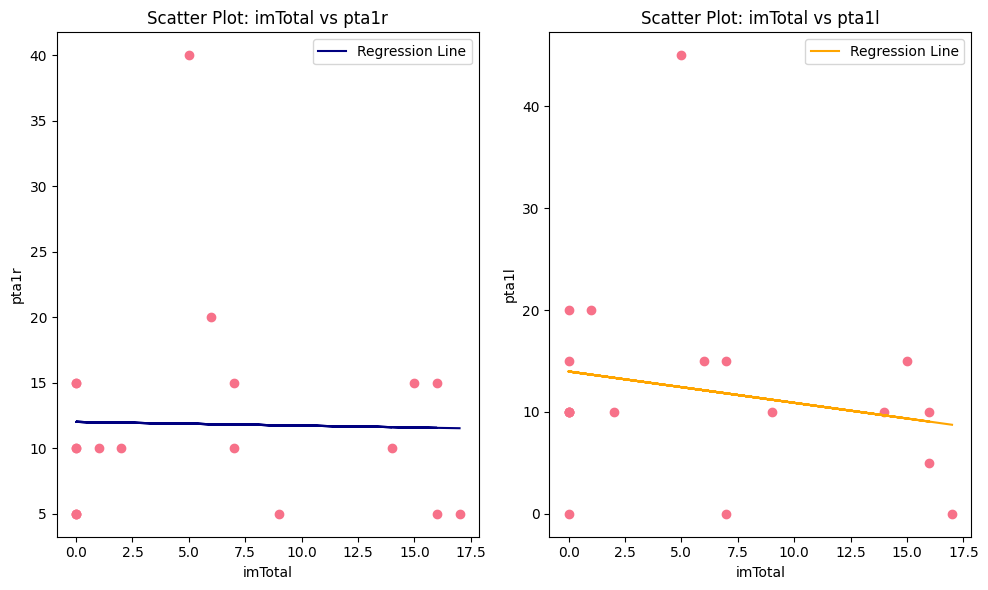

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'df' with the given columns
data = {
    'imTotal': df['imTotal'],
    'pta1r': df['pta1r'],
    'pta1l': df['pta1l']
}

new_df = pd.DataFrame(data)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(new_df['imTotal'], new_df['pta1r'], alpha=1)
slope, intercept, r_value, p_value, std_err = linregress(new_df['imTotal'], new_df['pta1r'])
plt.plot(new_df['imTotal'], slope * new_df['imTotal'] + intercept, color='navy', label='Regression Line')
plt.xlabel('imTotal')
plt.ylabel('pta1r')
plt.title('Scatter Plot: imTotal vs pta1r')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(new_df['imTotal'], new_df['pta1l'], alpha=1)
slope, intercept, r_value, p_value, std_err = linregress(new_df['imTotal'], new_df['pta1l'])
plt.plot(new_df['imTotal'], slope * new_df['imTotal'] + intercept, color='orange', label='Regression Line')
plt.xlabel('imTotal')
plt.ylabel('pta1l')
plt.title('Scatter Plot: imTotal vs pta1l')
plt.legend()

plt.tight_layout()
plt.savefig("pta1_scatter_plot")
plt.show()


## Ho4: Misophonia Impact vs HTLs (pta2r and pta2l)

In [26]:
import pandas as pd
from scipy.stats import spearmanr

# Assuming you have a dataframe named 'df' with the given columns
data = {
    'imTotal': df['imTotal'],
    'pta2r': df['pta2r'],
    'pta2l': df['pta2l']
}

new_df = pd.DataFrame(data)

# Calculate Spearman correlation and p-value
corr_imTotal_pta2r, p_value_imTotal_pta2r = spearmanr(new_df['imTotal'], new_df['pta2r'])
corr_imTotal_pta2l, p_value_imTotal_pta2l = spearmanr(new_df['imTotal'], new_df['pta2l'])

alpha = 0.05  # Significance level

print("Spearman Correlation between imTotal and pta2r:", format(corr_imTotal_pta2r, '.3f'))
print("p-value for the correlation:", format(p_value_imTotal_pta2r, '.3f'))
if p_value_imTotal_pta2r < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")

print("\nSpearman Correlation between imTotal and pta2l:", format(corr_imTotal_pta2l, '.3f'))
print("p-value for the correlation:", format(p_value_imTotal_pta2l, '.3f'))
if p_value_imTotal_pta2l < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")


Spearman Correlation between imTotal and pta2r: -0.485
p-value for the correlation: 0.035
Reject the null hypothesis. There is a significant correlation.

Spearman Correlation between imTotal and pta2l: -0.432
p-value for the correlation: 0.065
Fail to reject the null hypothesis. There is no significant correlation.


## Scatter Plot for the association between Misophonia Impact and HTLs(2kHz)

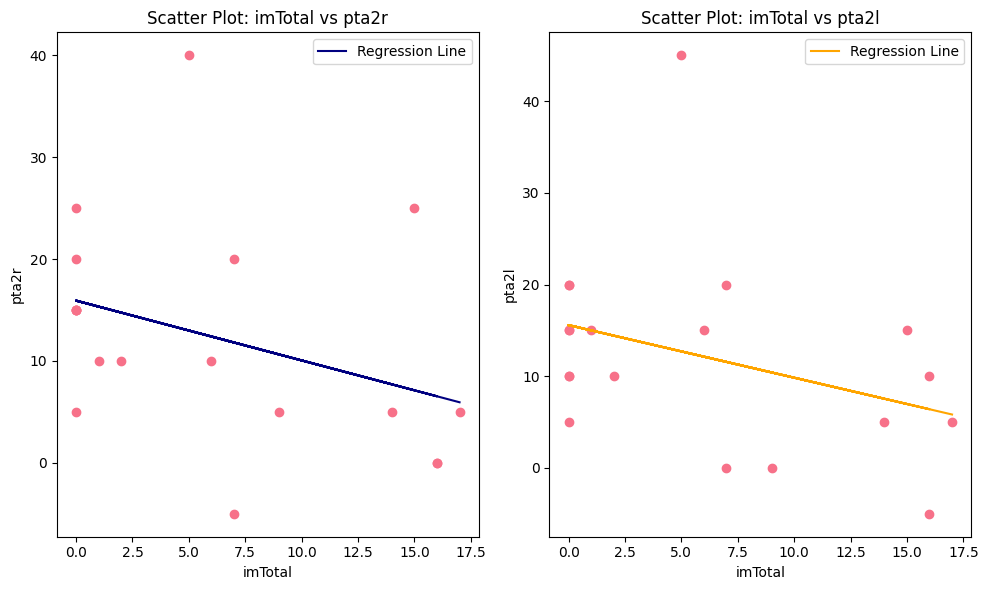

In [27]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'df' with the given columns
data = {
    'imTotal': df['imTotal'],
    'pta2r': df['pta2r'],
    'pta2l': df['pta2l']
}

new_df = pd.DataFrame(data)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(new_df['imTotal'], new_df['pta2r'], alpha=1)
slope, intercept, r_value, p_value, std_err = linregress(new_df['imTotal'], new_df['pta2r'])
plt.plot(new_df['imTotal'], slope * new_df['imTotal'] + intercept, color='navy', label='Regression Line')
plt.xlabel('imTotal')
plt.ylabel('pta2r')
plt.title('Scatter Plot: imTotal vs pta2r')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(new_df['imTotal'], new_df['pta2l'], alpha=1)
slope, intercept, r_value, p_value, std_err = linregress(new_df['imTotal'], new_df['pta2l'])
plt.plot(new_df['imTotal'], slope * new_df['imTotal'] + intercept, color='orange', label='Regression Line')
plt.xlabel('imTotal')
plt.ylabel('pta2l')
plt.title('Scatter Plot: imTotal vs pta2l')
plt.legend()

plt.tight_layout()
plt.savefig("pta2_scatter_plot")
plt.show()


## Ho5: Misophonia Impact vs HTLs (pta3r and pta3l)

In [28]:
import pandas as pd
from scipy.stats import spearmanr

# Assuming you have a dataframe named 'df' with the given columns
data = {
    'imTotal': df['imTotal'],
    'pta3r': df['pta3r'],
    'pta3l': df['pta3l']
}

new_df = pd.DataFrame(data)

# Calculate Spearman correlation and p-value
corr_imTotal_pta3r, p_value_imTotal_pta3r = spearmanr(new_df['imTotal'], new_df['pta3r'])
corr_imTotal_pta3l, p_value_imTotal_pta3l = spearmanr(new_df['imTotal'], new_df['pta3l'])

alpha = 0.05  # Significance level

print("Spearman Correlation between imTotal and pta3r:", format(corr_imTotal_pta3r, '.3f'))
print("p-value for the correlation:", format(p_value_imTotal_pta3r, '.3f'))
if p_value_imTotal_pta3r < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")

print("\nSpearman Correlation between imTotal and pta3l:", format(corr_imTotal_pta3l, '.3f'))
print("p-value for the correlation:", format(p_value_imTotal_pta3l, '.3f'))
if p_value_imTotal_pta3l < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")


Spearman Correlation between imTotal and pta3r: -0.339
p-value for the correlation: 0.155
Fail to reject the null hypothesis. There is no significant correlation.

Spearman Correlation between imTotal and pta3l: -0.389
p-value for the correlation: 0.100
Fail to reject the null hypothesis. There is no significant correlation.


## Scatter Plot for the association between Misophonia Impact and HTLs(3kHz)

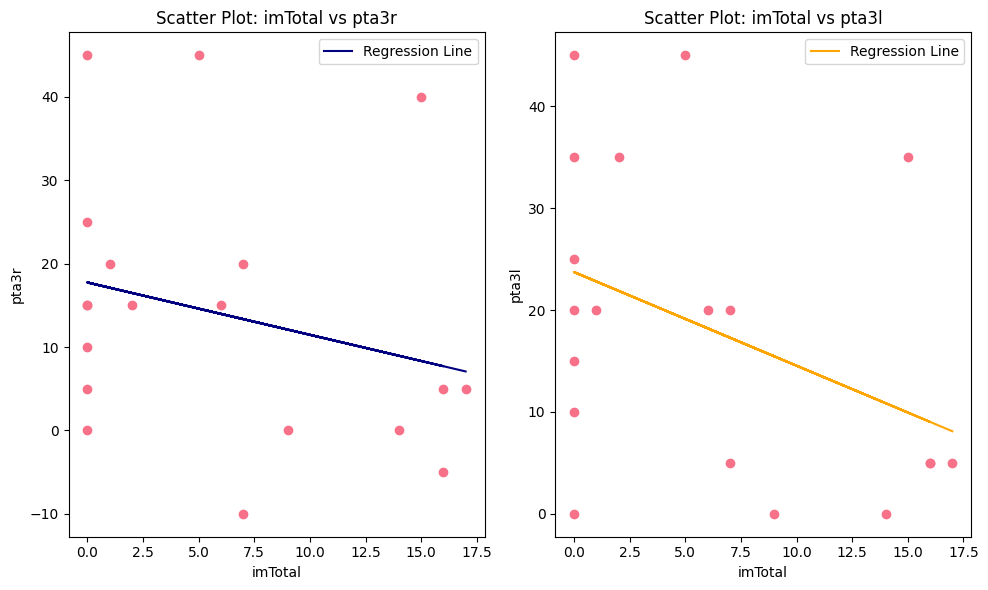

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'df' with the given columns
data = {
    'imTotal': df['imTotal'],
    'pta3r': df['pta3r'],
    'pta3l': df['pta3l']
}

new_df = pd.DataFrame(data)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(new_df['imTotal'], new_df['pta3r'], alpha=1)
slope, intercept, r_value, p_value, std_err = linregress(new_df['imTotal'], new_df['pta3r'])
plt.plot(new_df['imTotal'], slope * new_df['imTotal'] + intercept, color='navy', label='Regression Line')
plt.xlabel('imTotal')
plt.ylabel('pta3r')
plt.title('Scatter Plot: imTotal vs pta3r')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(new_df['imTotal'], new_df['pta3l'], alpha=1)
slope, intercept, r_value, p_value, std_err = linregress(new_df['imTotal'], new_df['pta3l'])
plt.plot(new_df['imTotal'], slope * new_df['imTotal'] + intercept, color='orange', label='Regression Line')
plt.xlabel('imTotal')
plt.ylabel('pta3l')
plt.title('Scatter Plot: imTotal vs pta3l')
plt.legend()

plt.tight_layout()
plt.savefig("pta3_scatter_plot")
plt.show()


## Ho6: Misophonia Impact vs HTLs (pta4r and pta4l)

In [30]:
import pandas as pd
from scipy.stats import spearmanr

# Assuming you have a dataframe named 'df' with the given columns
data = {
    'imTotal': df['imTotal'],
    'pta4r': df['pta4r'],
    'pta4l': df['pta4l']
}

new_df = pd.DataFrame(data)

# Calculate Spearman correlation and p-value
corr_imTotal_pta4r, p_value_imTotal_pta4r = spearmanr(new_df['imTotal'], new_df['pta4r'])
corr_imTotal_pta4l, p_value_imTotal_pta4l = spearmanr(new_df['imTotal'], new_df['pta4l'])

alpha = 0.05  # Significance level

print("Spearman Correlation between imTotal and pta4r:", format(corr_imTotal_pta4r, '.3f'))
print("p-value for the correlation:", format(p_value_imTotal_pta4r, '.3f'))
if p_value_imTotal_pta4r < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")

print("\nSpearman Correlation between imTotal and pta4l:", format(corr_imTotal_pta4l, '.3f'))
print("p-value for the correlation:", format(p_value_imTotal_pta4l, '.3f'))
if p_value_imTotal_pta4l < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")


Spearman Correlation between imTotal and pta4r: -0.201
p-value for the correlation: 0.410
Fail to reject the null hypothesis. There is no significant correlation.

Spearman Correlation between imTotal and pta4l: -0.359
p-value for the correlation: 0.132
Fail to reject the null hypothesis. There is no significant correlation.


## Scatter Plot for the association between Misophonia Impact and HTLs(4kHz)

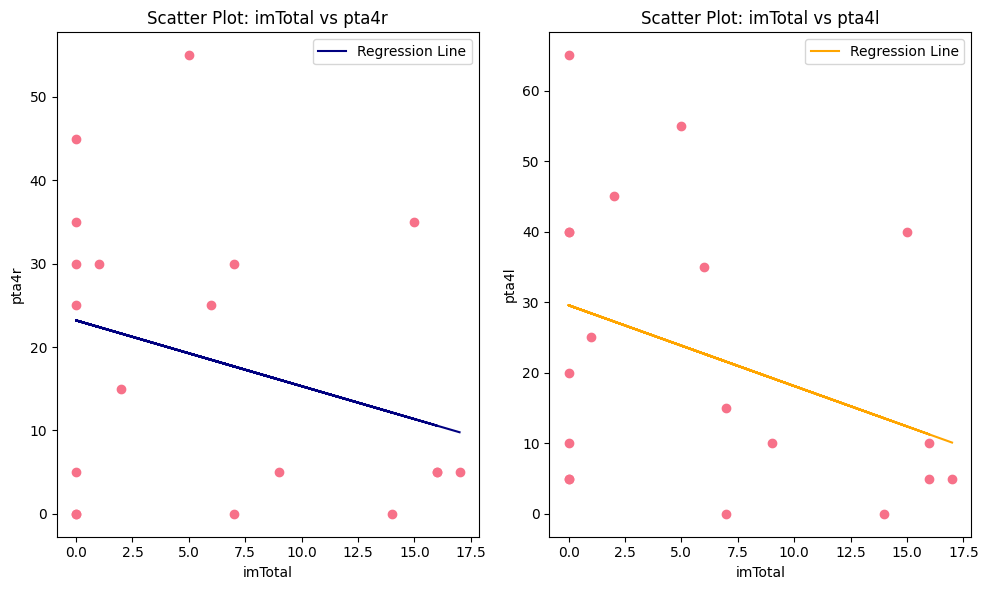

In [31]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, linregress
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'df' with the given columns
data = {
    'imTotal': df['imTotal'],
    'pta4r': df['pta4r'],
    'pta4l': df['pta4l']
}

new_df = pd.DataFrame(data)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(new_df['imTotal'], new_df['pta4r'], alpha=1)
slope, intercept, r_value, p_value, std_err = linregress(new_df['imTotal'], new_df['pta4r'])
plt.plot(new_df['imTotal'], slope * new_df['imTotal'] + intercept, color='navy', label='Regression Line')
plt.xlabel('imTotal')
plt.ylabel('pta4r')
plt.title('Scatter Plot: imTotal vs pta4r')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(new_df['imTotal'], new_df['pta4l'], alpha=1)
slope, intercept, r_value, p_value, std_err = linregress(new_df['imTotal'], new_df['pta4l'])
plt.plot(new_df['imTotal'], slope * new_df['imTotal'] + intercept, color='orange', label='Regression Line')
plt.xlabel('imTotal')
plt.ylabel('pta4l')
plt.title('Scatter Plot: imTotal vs pta4l')
plt.legend()

plt.tight_layout()
plt.savefig("pta4_scatter_plot")
plt.show()


## Ho7: Misophonia Impact vs HTLs (pta6r and pta6l)

In [32]:
import pandas as pd
from scipy.stats import spearmanr

# Assuming you have a dataframe named 'df' with the given columns
data = {
    'imTotal': df['imTotal'],
    'pta6r': df['pta6r'],
    'pta6l': df['pta6l']
}

new_df = pd.DataFrame(data)

# Calculate Spearman correlation and p-value
corr_imTotal_pta6r, p_value_imTotal_pta6r = spearmanr(new_df['imTotal'], new_df['pta6r'])
corr_imTotal_pta6l, p_value_imTotal_pta6l = spearmanr(new_df['imTotal'], new_df['pta6l'])

alpha = 0.05  # Significance level

print("Spearman Correlation between imTotal and pta6r:", format(corr_imTotal_pta6r, '.3f'))
print("p-value for the correlation:", format(p_value_imTotal_pta6r, '.3f'))
if p_value_imTotal_pta6r < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")

print("\nSpearman Correlation between imTotal and pta6l:", format(corr_imTotal_pta6l, '.3f'))
print("p-value for the correlation:", format(p_value_imTotal_pta6l, '.3f'))
if p_value_imTotal_pta6l < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")


Spearman Correlation between imTotal and pta6r: -0.353
p-value for the correlation: 0.138
Fail to reject the null hypothesis. There is no significant correlation.

Spearman Correlation between imTotal and pta6l: -0.242
p-value for the correlation: 0.318
Fail to reject the null hypothesis. There is no significant correlation.


## Scatter Plot for the association between Misophonia Impact and HTLs(6kHz)

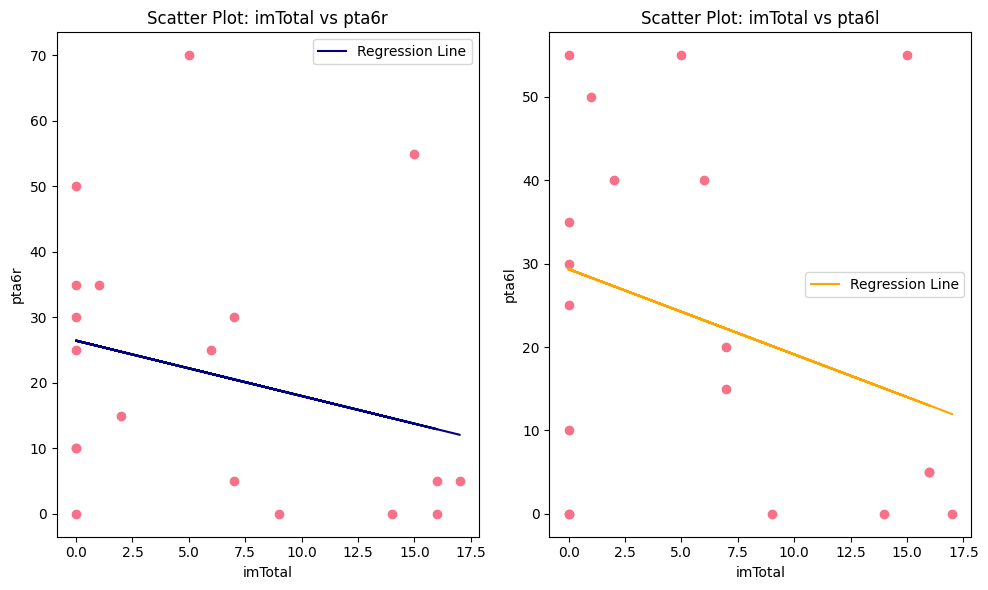

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'df' with the given columns
data = {
    'imTotal': df['imTotal'],
    'pta6r': df['pta6r'],
    'pta6l': df['pta6l']
}

new_df = pd.DataFrame(data)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(new_df['imTotal'], new_df['pta6r'], alpha=1)
slope, intercept, r_value, p_value, std_err = linregress(new_df['imTotal'], new_df['pta6r'])
plt.plot(new_df['imTotal'], slope * new_df['imTotal'] + intercept, color='navy', label='Regression Line')
plt.xlabel('imTotal')
plt.ylabel('pta6r')
plt.title('Scatter Plot: imTotal vs pta6r')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(new_df['imTotal'], new_df['pta6l'], alpha=1)
slope, intercept, r_value, p_value, std_err = linregress(new_df['imTotal'], new_df['pta6l'])
plt.plot(new_df['imTotal'], slope * new_df['imTotal'] + intercept, color='orange', label='Regression Line')
plt.xlabel('imTotal')
plt.ylabel('pta6l')
plt.title('Scatter Plot: imTotal vs pta6l')
plt.legend()

plt.tight_layout()
plt.savefig("pta6_scatter_plot")
plt.show()


## Ho8: Misophonia Impact vs HTLs (pta8r and pta8l)

In [34]:
import pandas as pd
from scipy.stats import spearmanr

# Assuming you have a dataframe named 'df' with the given columns
data = {
    'imTotal': df['imTotal'],
    'pta8r': df['pta8r'],
    'pta8l': df['pta8l']
}

new_df = pd.DataFrame(data)

# Calculate Spearman correlation and p-value
corr_imTotal_pta8r, p_value_imTotal_pta8r = spearmanr(new_df['imTotal'], new_df['pta8r'])
corr_imTotal_pta8l, p_value_imTotal_pta8l = spearmanr(new_df['imTotal'], new_df['pta8l'])

alpha = 0.05  # Significance level

print("Spearman Correlation between imTotal and pta8r:", format(corr_imTotal_pta8r, '.3f'))
print("p-value for the correlation:", format(p_value_imTotal_pta8r, '.3f'))
if p_value_imTotal_pta8r < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")

print("\nSpearman Correlation between imTotal and pta8l:", format(corr_imTotal_pta8l, '.3f'))
print("p-value for the correlation:", format(p_value_imTotal_pta8l, '.3f'))
if p_value_imTotal_pta8l < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")


Spearman Correlation between imTotal and pta8r: -0.291
p-value for the correlation: 0.227
Fail to reject the null hypothesis. There is no significant correlation.

Spearman Correlation between imTotal and pta8l: -0.182
p-value for the correlation: 0.455
Fail to reject the null hypothesis. There is no significant correlation.


## Scatter Plot for the association between Misophonia Impact and HTLs(8kHz)

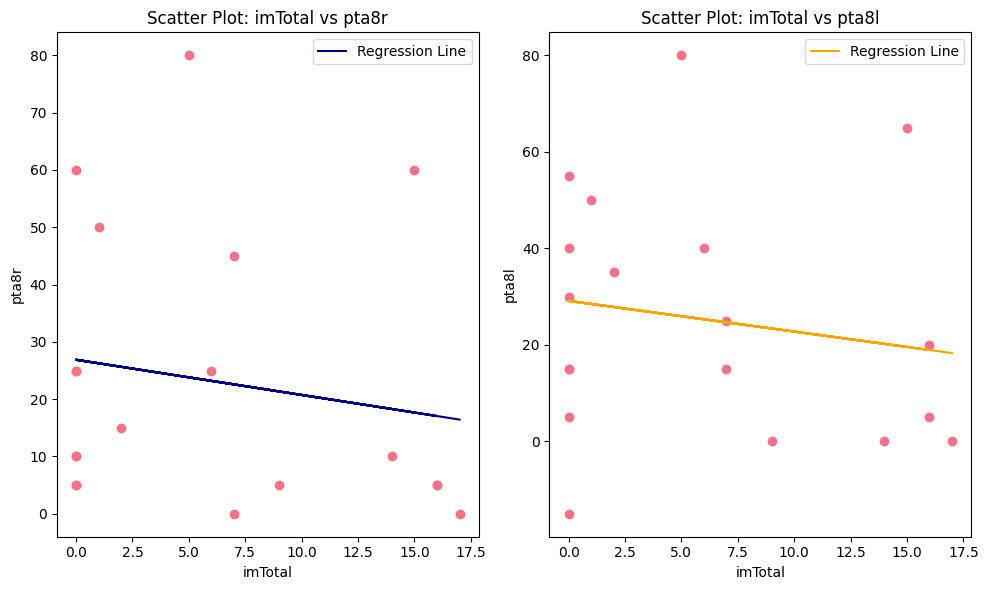

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, linregress
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'df' with the given columns
data = {
    'imTotal': df['imTotal'],
    'pta8r': df['pta8r'],
    'pta8l': df['pta8l']
}

new_df = pd.DataFrame(data)



# Scatter plot with regression line
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(new_df['imTotal'], new_df['pta8r'], alpha=1)
slope, intercept, r_value, p_value, std_err = linregress(new_df['imTotal'], new_df['pta8r'])
plt.plot(new_df['imTotal'], slope * new_df['imTotal'] + intercept, color='navy', label='Regression Line')
plt.xlabel('imTotal')
plt.ylabel('pta8r')
plt.title('Scatter Plot: imTotal vs pta8r')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(new_df['imTotal'], new_df['pta8l'], alpha=1)
slope, intercept, r_value, p_value, std_err = linregress(new_df['imTotal'], new_df['pta8l'])
plt.plot(new_df['imTotal'], slope * new_df['imTotal'] + intercept, color='orange', label='Regression Line')
plt.xlabel('imTotal')
plt.ylabel('pta8l')
plt.title('Scatter Plot: imTotal vs pta8l')
plt.legend()

plt.tight_layout()
plt.savefig("pta8_scatter_plot")
plt.show()
